In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import set_option

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Useful functions

In [2]:
# This function gives me a quick but through display of a dataset.
def data_glimps(dataset):    
    print("Shape:",dataset.shape,"\n")
    print("Types:\n",dataset.dtypes,"\n")
    print("isnull:\n",dataset.isnull().sum(),"\n")
    print("Columns_names:\n",dataset.columns,"\n")
    
    fig,ax = plt.subplots(figsize=(9,7),squeeze=True)
    mask = np.zeros_like(dataset.corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    ax.set_xticklabels(ax.xaxis.get_ticklabels(),fontsize=13,rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(),fontsize=13,rotation=30)
    sns.heatmap(dataset.corr(),vmin=-1, vmax=1, mask=mask, annot=True,ax=ax)
    plt.show()
    "\n"
    set_option('precision',5)

    display(dataset.describe())
    display(dataset.head())
    display(dataset.tail())

In [3]:
# This function quickly shows the amount of unique values within each column.
def col_unique_values(dataset):
    num_unique=[]
    for i in dataset.columns:
        num_unique.append(i+':'+str(len(dataset[i].unique())))
    print(num_unique)


In [4]:
# quickly perform "groupby and .count()" on a dataset
def groupby_count(dataset,colum_str):
    return dataset.groupby(colum_str).count()

In [5]:
# quickly perform "groupby and .sum()" on a dataset
def groupby_sum(dataset,colum_str):
    return dataset.groupby(colum_str).sum()

In [6]:
# to_datetime certain columns, making data manipulation easier.
def date_info(dataset,col_str):
    dataset[col_str]=pd.to_datetime(dataset[col_str])
    dataset['year']=dataset[col_str].dt.year
    dataset['month']=dataset[col_str].dt.month
    dataset['day_of_week']=dataset[col_str].dt.weekday_name
    dataset['hour']=dataset[col_str].dt.hour
    dataset['year_month']=[str(i)+'_'+str(j) for i,j in zip(dataset['year'], dataset['month'])]


In [7]:
# have a better look of the quantile numbers
def boxplot_num(col):
    Q1 = np.quantile(col, 0.25)
    Q2 = np.quantile(col, 0.5)
    Q3 = np.quantile(col, 0.75)
    Above = Q3 + 1.5*(Q3-Q1)
    Below = Q1 - 1.5*(Q3-Q1)
    print('Above',Above, '\n','Q3',Q3,'\n','Q2',Q2,'\n','Q1',Q1,'\n', 'Below',Below)

# Load csv files

In [8]:
video_stats = pd.read_csv("/Users/paxton615/Desktop/meclass/超大video_stats.csv")

In [9]:
wx_usr_login_account = pd.read_csv('/Users/paxton615/Desktop/meclass/wx_usr_login_account.csv')

In [10]:
words_video_friends_follow = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_friends_follow.csv')

In [11]:
words_video_favorite= pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_favorite.csv')

In [12]:
words_video_comment = pd.read_csv("/Users/paxton615/Desktop/meclass/words_video_comment.csv",error_bad_lines=False)

b'Skipping line 186: expected 5 fields, saw 6\nSkipping line 524: expected 5 fields, saw 6\nSkipping line 2328: expected 5 fields, saw 7\nSkipping line 9947: expected 5 fields, saw 6\n'


In [13]:
words_video_comment_reply = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_comment_reply.csv')

In [14]:
words_video_comment_praise = pd.read_csv('/Users/paxton615/Desktop/meclass/words_video_comment_praise.csv')

In [15]:
subscribed_video_package = pd.read_csv('/Users/paxton615/Desktop/meclass/subscribed_video_package.csv')

In [16]:
r_word_video = pd.read_csv('/Users/paxton615/Desktop/meclass/r_word_video.csv')

In [17]:
r_video_tag = pd.read_csv('/Users/paxton615/Desktop/meclass/r_video_tag.csv')

In [18]:
pmsg_bind_account = pd.read_csv('/Users/paxton615/Desktop/meclass/pmsg_bind_account.csv')

In [19]:
pay_recharge_log = pd.read_csv('/Users/paxton615/Desktop/meclass/pay_recharge_log.csv')

In [20]:
pay_coupon= pd.read_csv('/Users/paxton615/Desktop/meclass/pay_coupon.csv')

In [21]:
pay_coupon_code= pd.read_csv('/Users/paxton615/Desktop/meclass/pay_coupon_code.csv')

In [22]:
paid_word_category= pd.read_csv('/Users/paxton615/Desktop/meclass/paid_word_category.csv')

In [23]:
mobilephone_stats= pd.read_csv('/Users/paxton615/Desktop/meclass/mobilephone_stats.csv')

In [24]:
daily_sign= pd.read_csv('/Users/paxton615/Desktop/meclass/daily_sign.csv')

In [25]:
ad_lesson_video= pd.read_csv('/Users/paxton615/Desktop/meclass/ad_lesson_video.csv')

# Exploratory Data Analysis & Keep Notes

Shape: (4396885, 9) 

Types:
 user_id            int64
device_id         object
video_id           int64
end_play_time     object
play_duration      int64
play_times         int64
stats_time        object
network           object
popularity       float64
dtype: object 

isnull:
 user_id           0
device_id         0
video_id          0
end_play_time     0
play_duration     0
play_times        0
stats_time        0
network          23
popularity        0
dtype: int64 

Columns_names:
 Index(['user_id', 'device_id', 'video_id', 'end_play_time', 'play_duration',
       'play_times', 'stats_time', 'network', 'popularity'],
      dtype='object') 



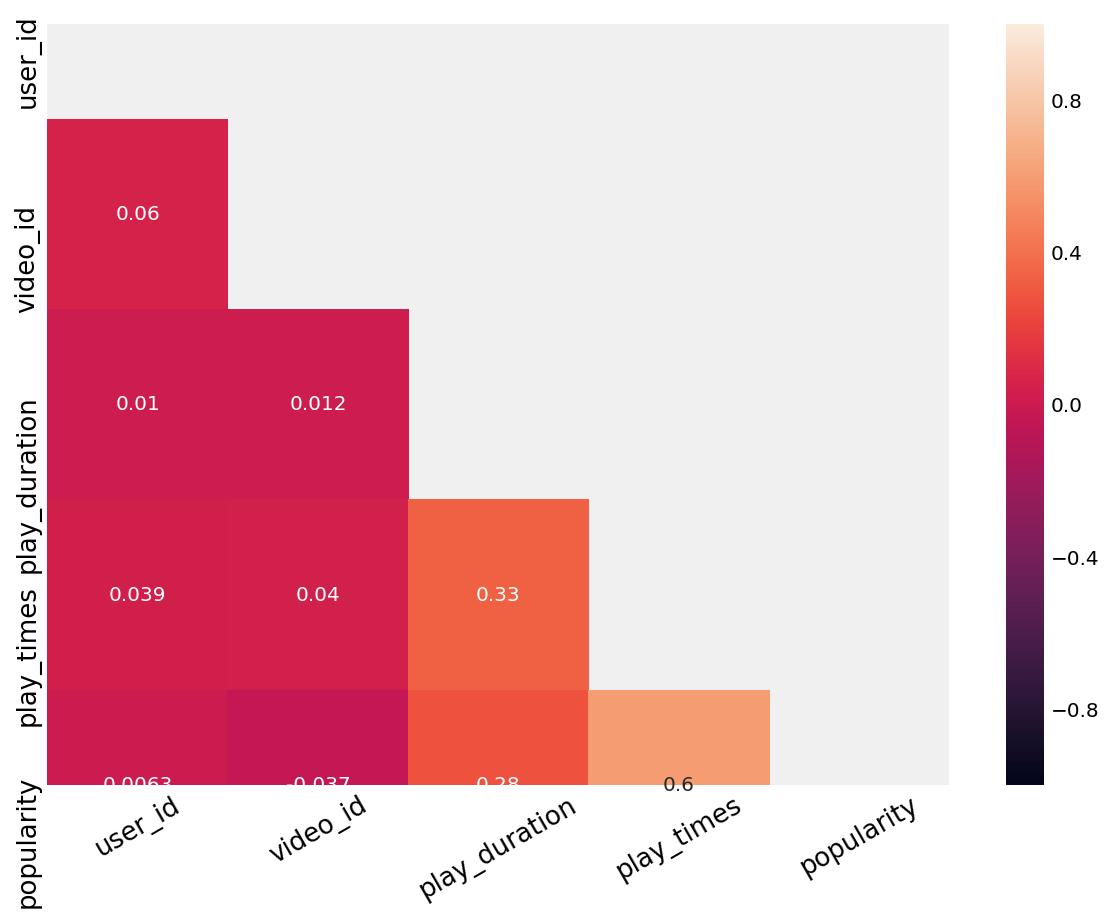

,user_id,video_id,play_duration,play_times,popularity
count,4.39688e+06,4.39688e+06,4.39688e+06,4.39688e+06,4.39688e+06
mean,2.35676e+04,8.94506e+03,5.77948e+01,2.21129e+00,8.51613e-01
std,1.85477e+04,2.57350e+03,5.56206e+02,6.73271e+00,4.95974e+00
min,0.00000e+00,1.87000e+02,0.00000e+00,0.00000e+00,0.00000e+00
25%,0.00000e+00,6.95500e+03,3.00000e+00,1.00000e+00,9.00000e-03
50%,2.50610e+04,9.40900e+03,1.50000e+01,1.00000e+00,3.37000e-01
75%,4.00550e+04,9.93100e+03,5.20000e+01,2.00000e+00,1.13000e+00
max,5.49960e+04,1.51300e+04,3.74581e+05,2.28600e+03,4.77744e+03


,user_id,device_id,video_id,end_play_time,play_duration,play_times,stats_time,network,popularity
0,0,...,4912,2019-02-18 21:45:29,7,1,2019-02-19 03:37:19,...,1.400
1,0,...,5469,2019-02-18 21:45:49,7,1,2019-02-19 03:37:18,...,1.400
2,0,...,6852,2019-02-18 21:45:41,10,1,2019-02-19 03:37:18,...,2.000
3,0,...,6939,2019-02-18 21:47:20,8,1,2019-02-19 03:37:14,...,1.333
4,0,...,6944,2019-02-18 21:44:48,2,1,2019-02-19 03:37:20,...,0.067


,user_id,device_id,video_id,end_play_time,play_duration,play_times,stats_time,network,popularity
4396880,54996,...,9409,2019-03-26 23:23:53,26,2,2019-03-27 03:34:57,...,2.366
4396881,54996,...,9478,2019-03-26 23:23:20,15,2,2019-03-27 03:34:58,...,1.171
4396882,54996,...,9594,2019-03-26 23:15:57,3,0,2019-03-27 03:35:21,...,0.000
4396883,54996,...,9619,2019-03-26 23:23:59,3,1,2019-03-27 03:34:56,...,0.052
4396884,54996,...,9763,2019-03-26 23:24:32,132,10,2019-03-27 03:34:55,...,1.483


In [26]:
data_glimps(video_stats)

In [27]:
col_unique_values(video_stats)

['user_id:42826', 'device_id:1', 'video_id:3237', 'end_play_time:3871946', 'play_duration:5410', 'play_times:480', 'stats_time:491951', 'network:2', 'popularity:16058']


In [28]:
video_stats.video_id.value_counts().head()

6944    55789
9153    53815
9273    40558
4912    40250
6852    39705
Name: video_id, dtype: int64

In [29]:
# null is not dealt

# video:
# can check each video_id has HOW MANY unique user_id
# get the total play_duration and play_times of each video_id
# don't know what "popularity" is, but we can take the sumup and mean number of it, just in case
# for video_info:
# useful cols：'user_id', 'video_id', 'end_play_time',
# 'play_duration','play_times', 'popularity'


Shape: (54421, 19) 

Types:
 usr_id                  float64
open_id                  object
app_name                 object
union_id                 object
nickname                 object
sex                      object
province                 object
city                     object
country                  object
headimgurl               object
privilege               float64
access_token             object
access_token_expiry      object
refresh_token            object
refresh_token_expiry     object
last_login_time          object
last_refresh_time        object
scope_infos              object
ex_code                  object
dtype: object 

isnull:
 usr_id                  12231
open_id                     0
app_name                    0
union_id                    0
nickname                    3
sex                         0
province                18342
city                    24001
country                  9258
headimgurl                290
privilege               54421
access_t

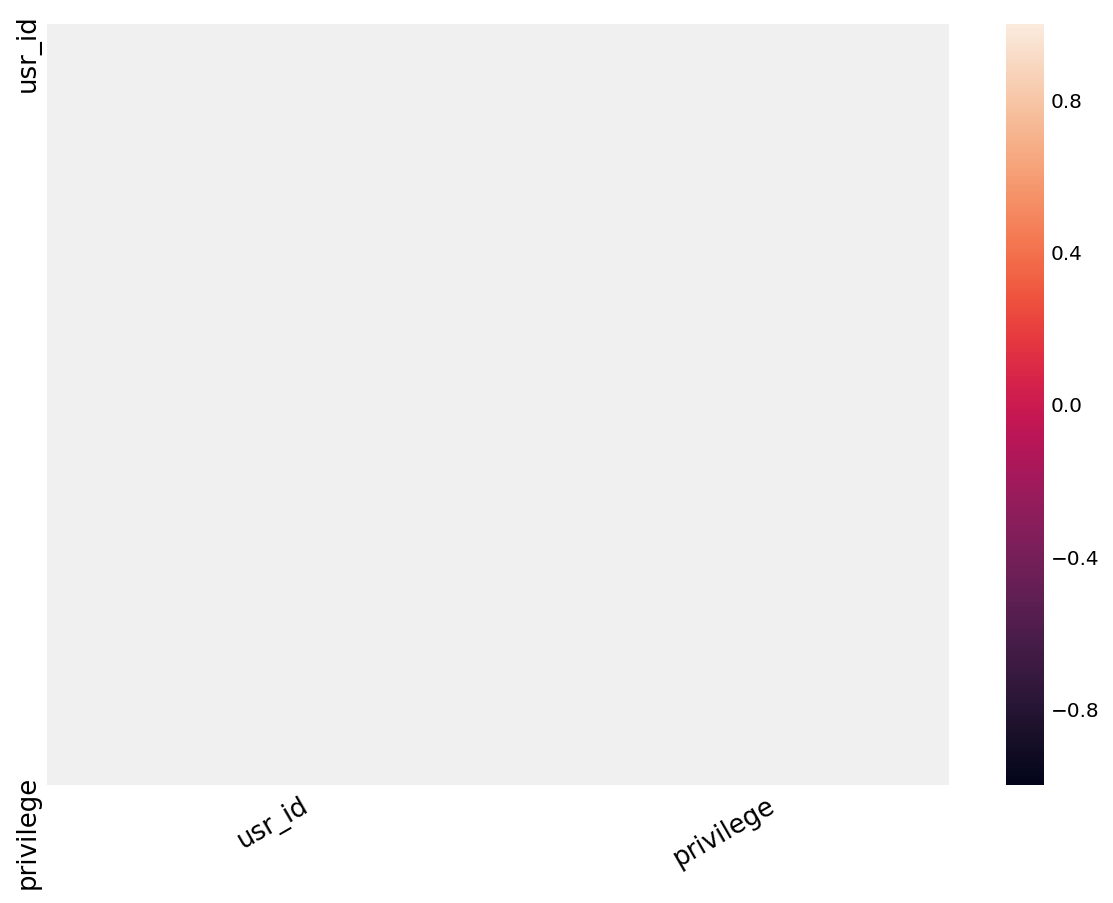

,usr_id,privilege
count,42190.00000,0.0
mean,28612.98338,NaN
std,14850.11900,NaN
min,304.00000,NaN
25%,15789.25000,NaN
50%,28381.50000,NaN
75%,41366.75000,NaN
max,55006.00000,NaN


,usr_id,open_id,app_name,union_id,nickname,sex,province,city,country,headimgurl,privilege,access_token,access_token_expiry,refresh_token,refresh_token_expiry,last_login_time,last_refresh_time,scope_infos,ex_code
0,NaN,oQth_xPOPliHVCVmr2_SC-IPhdJU,words_video,oMwAys_-kfT_2eWeVbeBXPOK7UE0,,0,Shaanxi,Xi'an,CN,http://wx.qlogo.cn/mmopen/VGJcqN5MGal9nxzolSRL...,NaN,Bms9JCLkVAGxt97QVZlKUqRJC1cnaEr9geVqJ5LkIt1l4x...,2017-07-28 09:52:47,yQweNm1GTGbEsFZtBwaWMJobOaXxpyC1llIkNX0QLTvyQI...,2017-08-26 08:02:47,2017-07-28 08:02:47,2017-07-28 08:02:47,snsapi_userinfo,NaN
1,NaN,oQth_xDls9uqZkD76Do1TBIuIryY,words_video,oMwAys_-XdgPxXQdV8Iw0K5R6caY,牧野,0,NaN,NaN,IS,http://wx.qlogo.cn/mmopen/vi_32/hKRMpnj7J8VMia...,NaN,veiTc96GssIQQgk5Snty3vjcqTpk5pHD0ISeGdpZyjMU78...,2017-10-18 20:45:07,3Y5yLnusZEB1Maf9JgkJwolY2qDACJvYolqApR_AUpL5gD...,2017-11-16 18:55:07,2017-10-18 18:55:07,2017-10-18 18:55:07,snsapi_userinfo,NaN
2,4425.0,oQth_xEt8GjeJtOvFO4mSzBWrn7E,words_video,oMwAys_1MfW5FD4jpacLWF-lBejw,妙善居士,0,NaN,NaN,NaN,/0,NaN,4_sF7--3NIAUK2f917hZsYwxQS_kp9KEcLdI8xb1Qz9EW1...,2017-11-25 13:03:57,4_QII4mtAiufBpQhrl0Q7X2OUaHyRcLGUNR-lybajGqx26...,2017-12-24 11:13:57,2017-11-25 11:13:57,2017-11-25 11:13:58,snsapi_userinfo,NaN
3,NaN,oQth_xOwE_zcOTZSlum5wGc6Z3cs,words_video,oMwAys_4O7fQ7JRYWFm8M80JgpfY,猫熊,0,NaN,NaN,NaN,http://wx.qlogo.cn/mmopen/vi_32/Dbnj2kbQ1lyFMB...,NaN,4_LLfYkltAdCa3Drdjm4-Dc2pq0nqG_W6iUnlwHPrg1Cd-...,2017-12-03 02:11:58,4_Ksx0hqJya8Z3dydR_1bLGfXmaNpSzSXCykIF9wsVTiQz...,2018-01-01 00:21:58,2017-12-03 00:21:58,2017-12-03 00:21:58,snsapi_userinfo,NaN
4,NaN,oQth_xBjrhIaC0hYWaMa1piPwcCw,words_video,oMwAys_4W_JBQRltDQamXj93hMNs,山吹,0,Beijing,Fangshan,CN,http://wx.qlogo.cn/mmopen/VGJcqN5MGak7WqAdqJNi...,NaN,zxsFiiTltuXhN8xnXckYlzmakBfrTKlxHswNzFRMuKCXo0...,2017-08-02 16:54:17,clsxf0ZiOiKENZTsI3KqxPRHd9-vWJNcAwRfR3Ra2HNmLK...,2017-08-31 15:04:17,2017-08-02 15:04:17,2017-08-02 15:04:17,snsapi_userinfo,NaN


,usr_id,open_id,app_name,union_id,nickname,sex,province,city,country,headimgurl,privilege,access_token,access_token_expiry,refresh_token,refresh_token_expiry,last_login_time,last_refresh_time,scope_infos,ex_code
54416,NaN,oNDe10XrIN_w4rd0-Tv0-36N_KcE,words_video,oTeYEwzzXxh6gXi4h1udZyhiwn4k,璃墨,0,Jiangxi,Ganzhou,CN,http://thirdwx.qlogo.cn/mmopen/vi_32/8CJE6ICia...,NaN,9_xvh1vVCak5mjZ8AjALdgfeOQwdYyuZHdzktLCEnw4lNg...,2018-04-25 14:24:42,9_biBVvmmw6-SIW1FhP-xrq4WxKbX4w-n5aZ_4-11yTwAL...,2018-05-24 12:34:42,2018-04-25 12:34:42,2018-04-25 12:34:42,snsapi_userinfo,NaN
54417,16922.0,oNDe10QMgvBgT8ejsc-QJbM8LJDY,words_video,oTeYEwzzZ8ZW7HO-zVrlBwLi0_RI,寒梅傲雪,0,NaN,NaN,NaN,http://thirdwx.qlogo.cn/mmopen/vi_32/0gF1yNfJC...,NaN,8_NxCrXmmUyOyCUbI7j_0tycxerNBELM1yup5kOKa-MQtk...,2018-04-01 00:25:01,8_qgKvaDKorlKX6NNhwiEZv0DLjHugC3v8iLprK3zp9DdR...,2018-04-29 22:35:01,2018-03-31 22:35:01,2018-03-31 22:35:02,snsapi_userinfo,NaN
54418,27690.0,oNDe10YG6xbbEhm1l0UCF9xxBs84,words_video,oTeYEwzzzF_23NC5boKCsxVtI_ZY,Daisy,0,Tipperary,NaN,IE,http://thirdwx.qlogo.cn/mmopen/vi_32/5zhBiczvS...,NaN,8_Mo7hH195fvy9cPpdX7TvgKMsR4hqJMKL3MbSXrxiq6Pc...,2018-04-16 21:15:01,8_mxWElRAYe1pY37uwNQwVfN47YETmx9d5YFDhSFQ3pgjZ...,2018-05-15 19:25:01,2018-04-16 19:25:01,2018-04-16 19:25:02,snsapi_userinfo,NaN
54419,33651.0,oNDe10eNVEvqh5XnV8kQSITMxRVA,words_video,oTeYEwzZZlOIEE0q6z4O8zj1ZPaU,钐,0,Sichuan,Chengdu,CN,http://thirdwx.qlogo.cn/mmopen/vi_32/DYAIOgq83...,NaN,9_2stz4L4icXC7jNnUep64BgcW7f3CoDqtoQarFAaIYvs7...,2018-04-26 21:12:05,9_gkw7Z6mE3_pFXovD1WrLQMbCO3G2azHGqxx7OZIsd860...,2018-05-25 19:22:05,2018-04-26 19:22:05,2018-04-26 19:22:05,snsapi_userinfo,NaN
54420,19665.0,oNDe10V-TFkPePb5lOjtJCl9o538,words_video,oTeYEwzZzmf_oH6roE8ZlSo8jKiA,早晨的一缕阳光,0,Jilin,Jilin,CN,http://thirdwx.qlogo.cn/mmopen/vi_32/IGEbC6vfl...,NaN,11_CiWoqBxAvgQfAJRMrtuIyRfB-m-7C52QYmGqYvgziIk...,2018-07-13 20:24:33,11_gfNYnX27bILSBvZSZPFzL-uXQ19Ms-yOEL8pYAEIO1s...,2018-08-11 18:34:33,2018-07-13 18:34:33,2018-07-13 18:34:33,snsapi_userinfo,NaN


In [30]:
data_glimps(wx_usr_login_account)

In [31]:
col_unique_values(wx_usr_login_account)

['usr_id:42081', 'open_id:54421', 'app_name:1', 'union_id:54421', 'nickname:45453', 'sex:4', 'province:609', 'city:837', 'country:242', 'headimgurl:54108', 'privilege:1', 'access_token:54419', 'access_token_expiry:54256', 'refresh_token:54419', 'refresh_token_expiry:54256', 'last_login_time:54257', 'last_refresh_time:54241', 'scope_infos:2', 'ex_code:2']


In [32]:
# null is not dealt
# Don't think many things are useful here.

# for user_info:
# maybe "last_login_time""last_refresh_time"can be use for certify 
# the question: at what time do users use our app the most frequently?

# TBD & user:
# with "city" ,"province" we can have a geographic idea of our users
# the completeness of data "city" is better than "province",

# maybe we can matching province with a map?
# jianshu.com/p/1a9531d2f153 There are APIs that can make it happen.

Shape: (45255, 4) 

Types:
 user_id               int64
following_user_id     int64
following_time       object
flag                  int64
dtype: object 

isnull:
 user_id              0
following_user_id    0
following_time       0
flag                 0
dtype: int64 

Columns_names:
 Index(['user_id', 'following_user_id', 'following_time', 'flag'], dtype='object') 



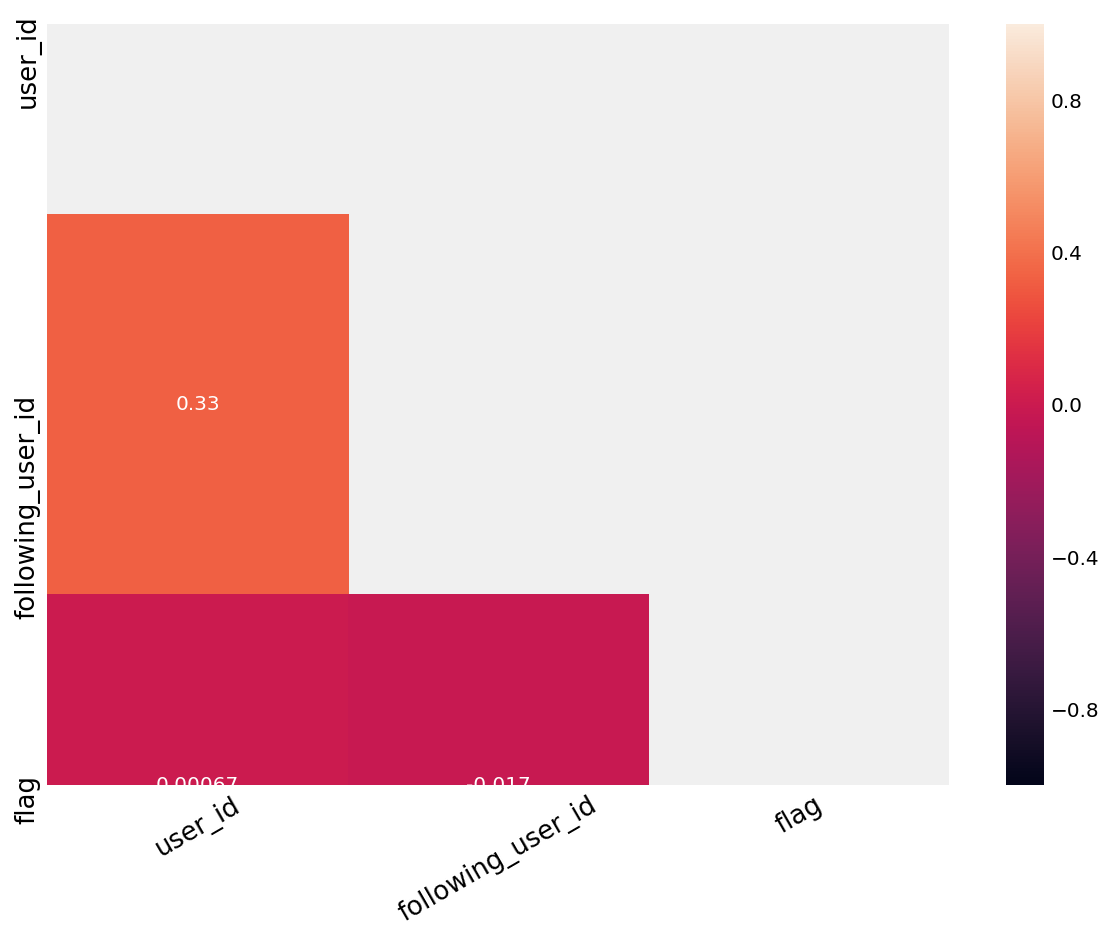

,user_id,following_user_id,flag
count,45255.00000,45255.00000,45255.00000
mean,19174.14847,32718.37298,0.94966
std,15318.64602,13649.43232,0.31328
min,411.00000,304.00000,-1.00000
25%,5471.00000,22077.50000,1.00000
50%,18013.00000,34626.00000,1.00000
75%,39799.00000,43721.00000,1.00000
max,44892.00000,55006.00000,1.00000


,user_id,following_user_id,following_time,flag
0,411,2264,2018-08-28 17:26:38,1
1,411,2672,2018-03-27 20:18:48,1
2,411,3054,2018-06-20 18:33:32,1
3,411,3389,2019-03-06 16:38:31,1
4,411,4382,2018-04-20 06:52:22,1


,user_id,following_user_id,following_time,flag
45250,44892,47737,2018-11-03 20:39:30,1
45251,44892,47821,2018-11-04 23:39:54,1
45252,44892,48176,2019-02-07 07:11:38,1
45253,44892,49674,2019-02-11 13:36:09,1
45254,44892,50637,2019-02-15 18:11:14,1


In [33]:
data_glimps(words_video_friends_follow)

In [34]:
col_unique_values(words_video_friends_follow)

['user_id:49', 'following_user_id:15533', 'following_time:45182', 'flag:2']


In [35]:
groupby_count(words_video_friends_follow,'user_id').head()

,following_user_id,following_time,flag
user_id,,,
411,612,612,612
445,283,283,283
917,98,98,98
929,162,162,162
995,1239,1239,1239


In [36]:
# no null
# not much use for video_info

# user_info:
# could add some value when analyzing user behaviour
# because "following" means they are interested in something

# user:
# "following_time" is good for analyzing when user use app analysis

Shape: (253048, 3) 

Types:
 user_id         int64
video_id        int64
create_time    object
dtype: object 

isnull:
 user_id        0
video_id       0
create_time    0
dtype: int64 

Columns_names:
 Index(['user_id', 'video_id', 'create_time'], dtype='object') 



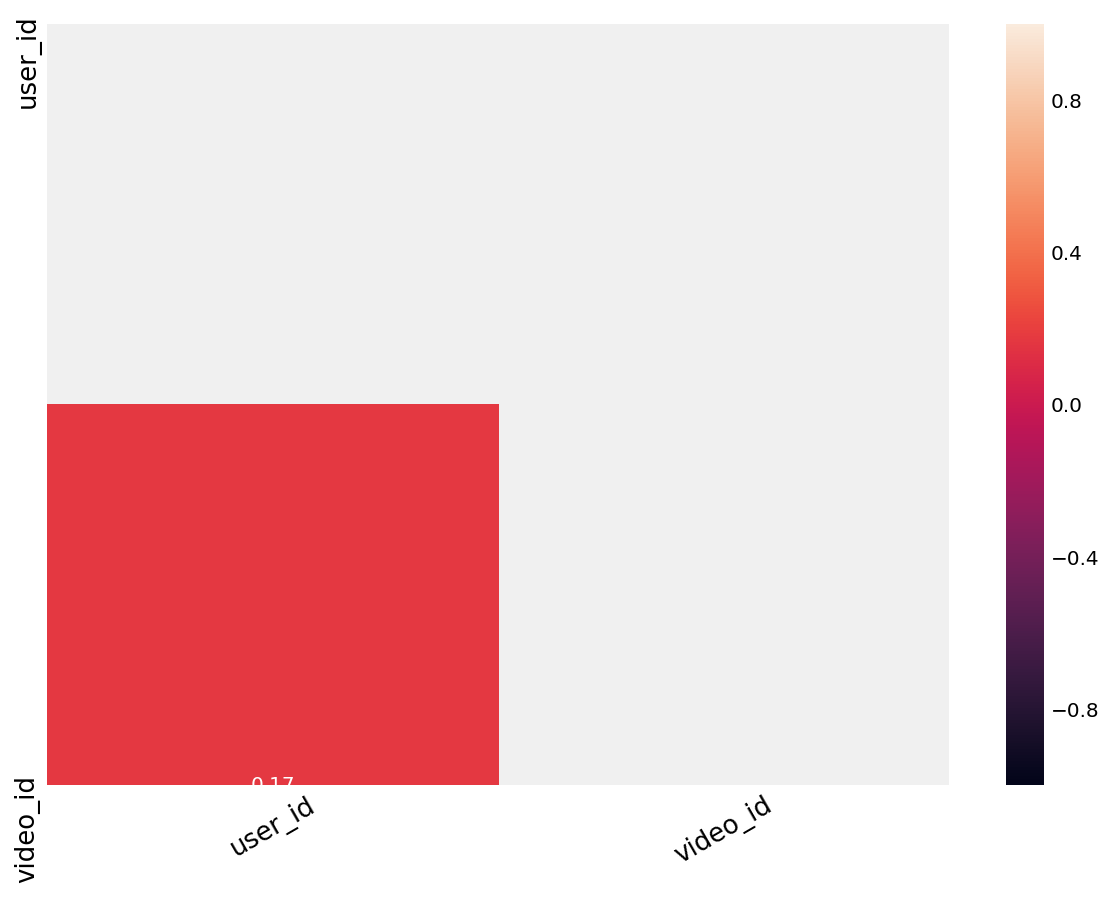

,user_id,video_id
count,253048.00000,253048.00000
mean,29189.74509,8923.39421
std,14117.14922,2499.50349
min,304.00000,187.00000
25%,17363.00000,7092.00000
50%,29927.00000,9346.00000
75%,40358.00000,9855.00000
max,55004.00000,15130.00000


,user_id,video_id,create_time
0,304,200,2018-03-23 23:26:58
1,304,212,2018-12-28 06:10:29
2,304,298,2018-02-28 18:36:34
3,304,344,2018-04-04 22:09:17
4,304,590,2018-01-31 11:13:31


,user_id,video_id,create_time
253043,55000,9153,2019-03-27 01:42:20
253044,55000,10187,2019-03-27 05:11:34
253045,55002,5469,2019-03-27 01:49:19
253046,55004,9291,2019-03-27 02:40:11
253047,55004,9462,2019-03-27 02:44:50


In [37]:
data_glimps(words_video_favorite)

In [38]:
col_unique_values(words_video_favorite)

['user_id:28917', 'video_id:6168', 'create_time:250897']


In [39]:
groupby_count(words_video_favorite,'video_id').sort_values(by='user_id',ascending=False).head()

,user_id,create_time
video_id,,
9153,8607,8607
9275,3929,3929
9273,3928,3928
6960,3605,3605
7017,3373,3373


In [40]:
v_favor_times = groupby_count(words_video_favorite,'video_id')

In [41]:
v_favor_times.describe()

,user_id,create_time
count,6168.00000,6168.00000
mean,41.02594,41.02594
std,206.99548,206.99548
min,1.00000,1.00000
25%,1.00000,1.00000
50%,2.00000,2.00000
75%,23.00000,23.00000
max,8607.00000,8607.00000


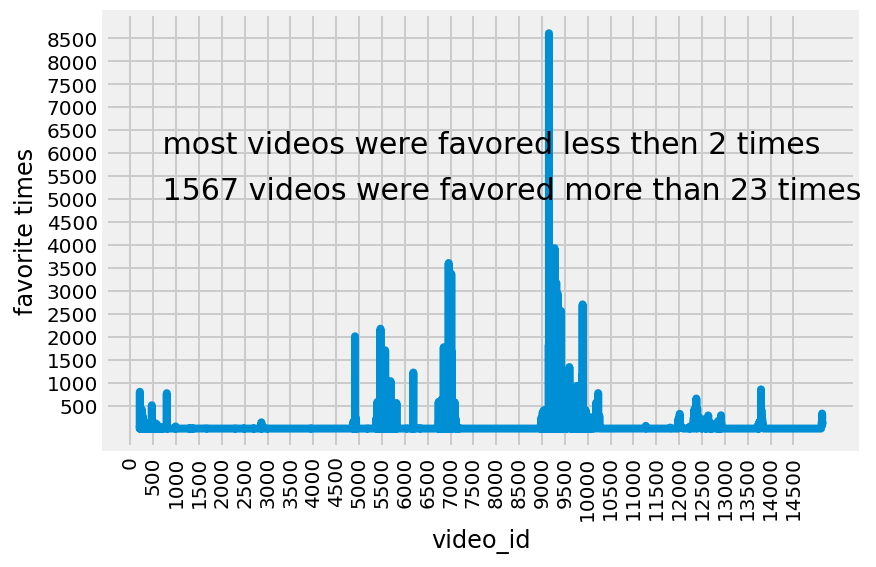

In [42]:
plt.plot(v_favor_times.index, v_favor_times.user_id)
plt.xlabel("video_id")
plt.ylabel("favorite times")
plt.yticks(range(500,9000,500))
plt.xticks(range(0,15000,500),rotation=90)
plt.text(500, 6000, " most videos were favored less then 2 times", fontsize=15)
plt.text(500, 5000, " 1567 videos were favored more than 23 times", fontsize=15)
plt.show()


In [43]:
y1=len(v_favor_times[v_favor_times['user_id'].between(23,100)])
y2=len(v_favor_times[v_favor_times['user_id'].between(101,500)])
y3=len(v_favor_times[v_favor_times['user_id'].between(501,1000)])
y4=len(v_favor_times[v_favor_times['user_id'].between(1001,8607)])
print((y1,y2,y3,y4), display(y1+y2+y3+y4))

1567

(1088, 400, 44, 35) None


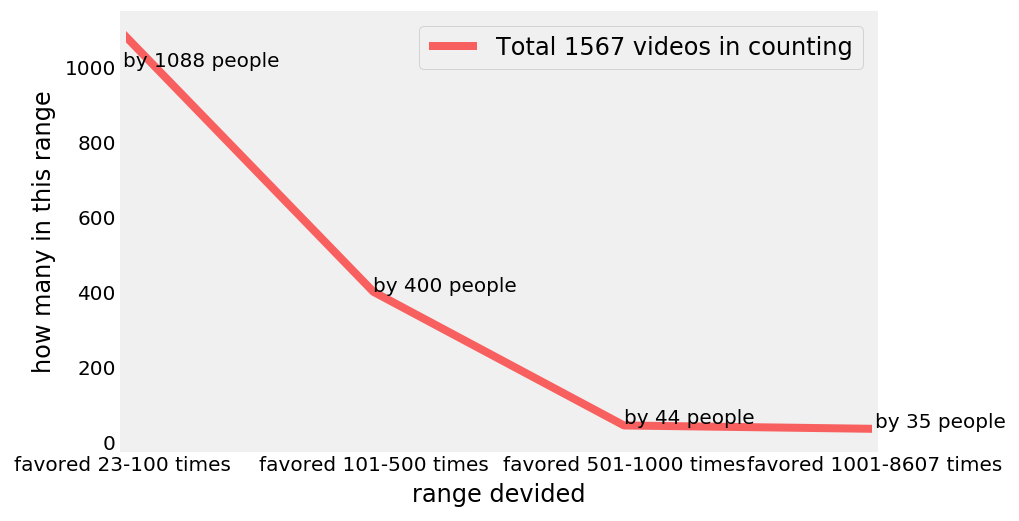

In [44]:
y1_4=[y1,y2,y3,y4]
x1_4=["favored 23-100 times","favored 101-500 times","favored 501-1000 times","favored 1001-8607 times"]

range1_4=pd.DataFrame(y1_4, index=x1_4, columns=["numbers"])

range1_4.plot(use_index=True,color="r",alpha=0.6, )
plt.text(0, 1000, "by 1088 people")
plt.text(1, 400, r"by 400 people")
plt.text(2, 50, "by 44 people")
plt.text(3, 40, "by 35 people")

plt.ylabel("how many in this range")
plt.xlabel("range devided")
plt.legend(["Total 1567 videos in counting"], loc=1, fontsize=12)
plt.grid(False)
plt.show()

In [45]:
# no null

# There are 1567 videos that have been favorited more than 23 times. Little chance they were tapped accidentally.
# There are 4601 videos have less than 10 favorites each. They could have been doen by accidents.


Shape: (16213, 5) 

Types:
 id           object
target_id    object
usr_id       object
nickname     object
content      object
dtype: object 

isnull:
 id            0
target_id    27
usr_id       40
nickname     41
content      64
dtype: int64 

Columns_names:
 Index(['id', 'target_id', 'usr_id', 'nickname', 'content'], dtype='object') 



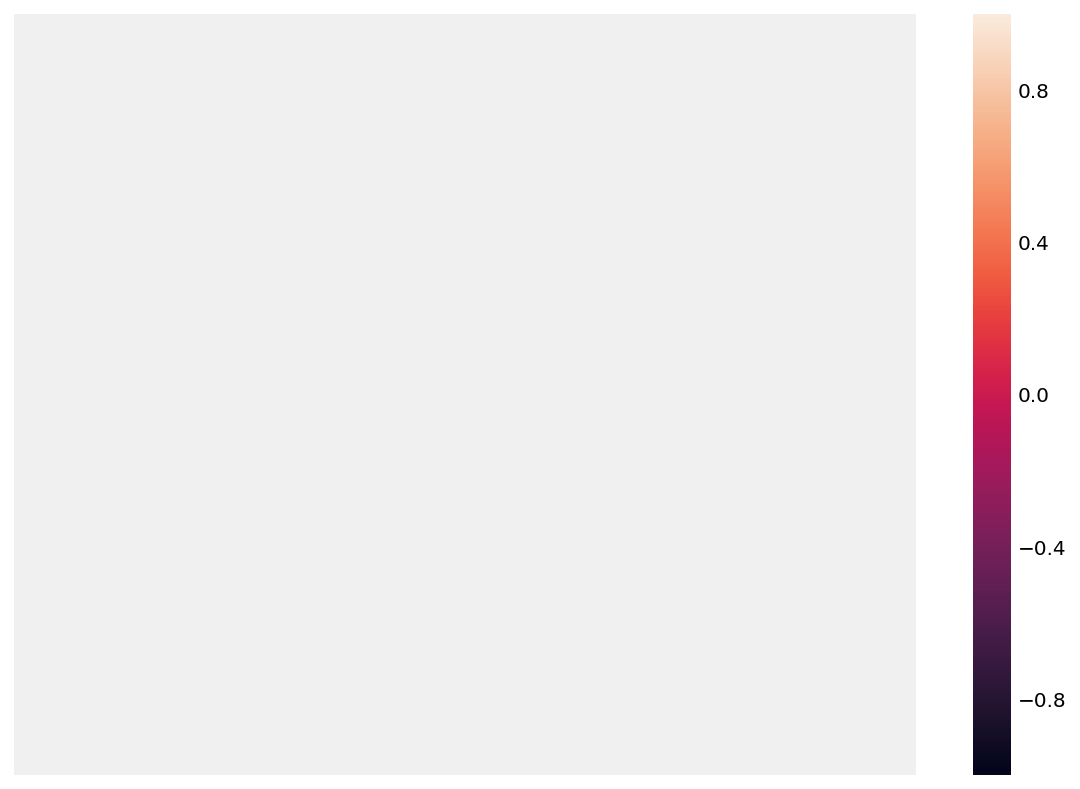

,id,target_id,usr_id,nickname,content
count,16213,16186,16173,16172,16149
unique,16211,2349,4409,4445,10949
top,The son says,9153,2264,cici,好听
freq,2,525,345,345,235


,id,target_id,usr_id,nickname,content
0,1,465,309,阿飞,要帅、要努力、要有事业、要受人尊重、要专一、要深情、要顾家、要陪孩子玩耍、要陪媳妇儿旅游。
1,2,463,304,梅先森,看过这片，太黑暗了
2,3,469,304,梅先森,（｡ӧ◡ӧ｡）
3,4,415,314,逆时针🐝,本来是来背单词的 但我光顾着看吃的了
4,5,471,309,阿飞,剧透：这哥们儿后来成为了麦当劳的大Boss


,id,target_id,usr_id,nickname,content
16208,16637,9042,31748,未来i,真心不错
16209,16638,10187,55000,蝴蝶蝶舞,Sounds great
16210,16639,12334,54818,丁戈,是真唱吗
16211,16640,12509,10312,橙子柚子橘子Betty,Always interesting
16212,16641,9462,35850,961505_328,好


In [46]:
data_glimps(words_video_comment)

In [47]:
col_unique_values(words_video_comment)

['id:16211', 'target_id:2350', 'usr_id:4410', 'nickname:4446', 'content:10950']


In [48]:
# be aware, there are nulls in this dataset

# for video_info:
# video_id and target_id, can be used to verify the authenticity of the column "popularity", since "popularity" is an algorithm invented by one of our developers. 


# NLP can be used on the 'content' column later.

Shape: (13685, 7) 

Types:
 id                  int64
usr_id              int64
target_id           int64
comment_id          int64
sub_comment_id      int64
replied_user_id     int64
reply_time         object
dtype: object 

isnull:
 id                 0
usr_id             0
target_id          0
comment_id         0
sub_comment_id     0
replied_user_id    0
reply_time         0
dtype: int64 

Columns_names:
 Index(['id', 'usr_id', 'target_id', 'comment_id', 'sub_comment_id',
       'replied_user_id', 'reply_time'],
      dtype='object') 



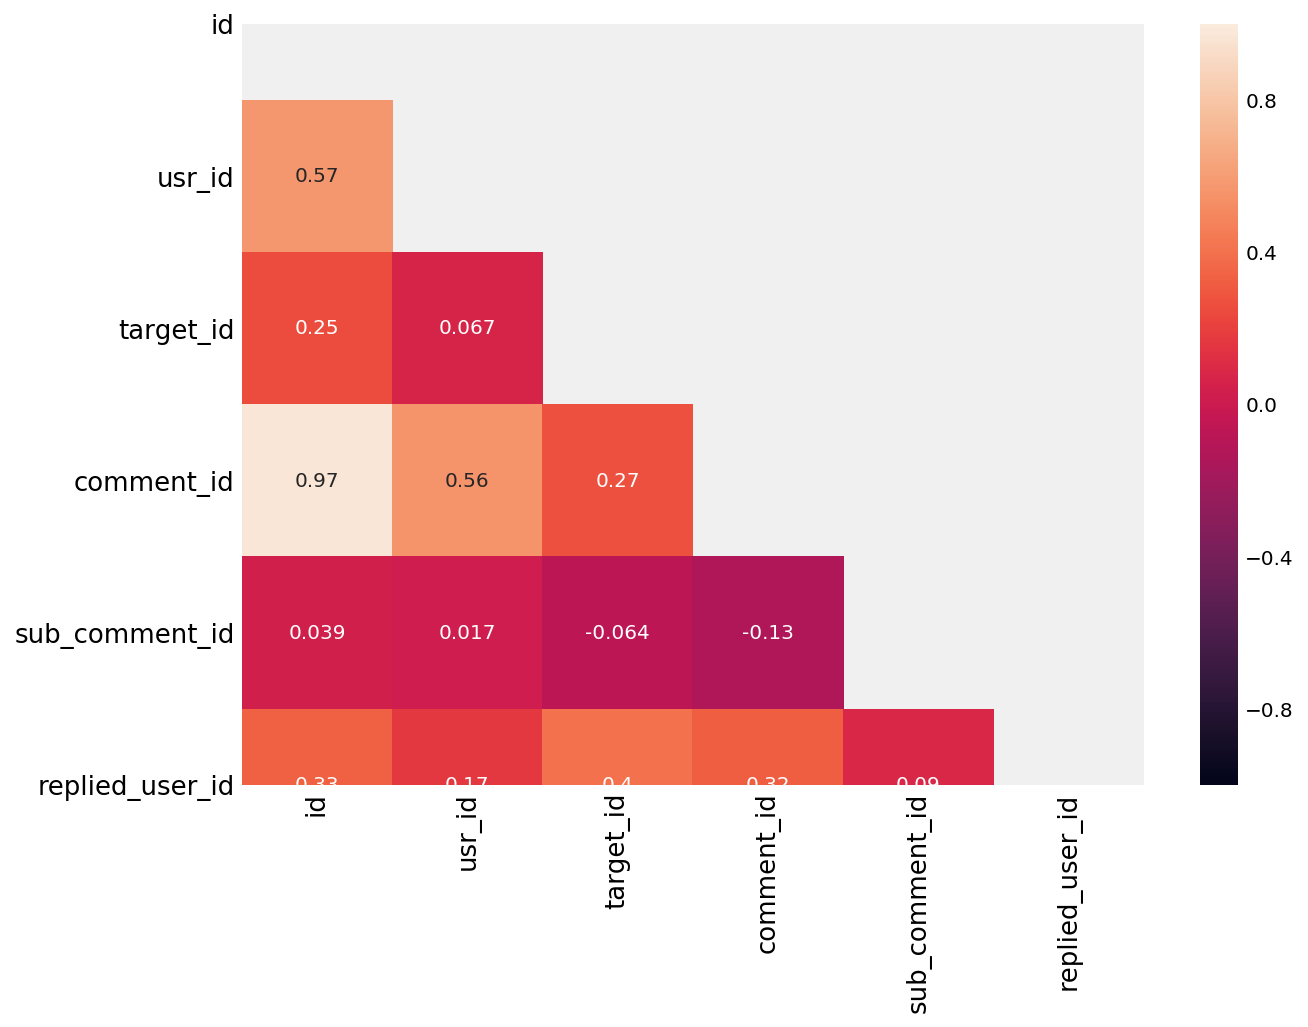

,id,usr_id,target_id,comment_id,sub_comment_id,replied_user_id
count,13685.00000,13685.00000,13685.00000,13685.00000,13685.00000,13685.00000
mean,8465.38100,29071.59204,9870.03756,8974.77106,38.92846,17244.39664
std,4322.83066,15224.62154,2174.90082,4450.92891,206.18355,13937.69508
min,31.00000,304.00000,207.00000,11.00000,0.00000,311.00000
25%,4850.00000,16597.00000,9275.00000,5284.00000,0.00000,5472.00000
50%,8629.00000,29584.00000,9627.00000,8996.00000,0.00000,18013.00000
75%,12186.00000,41661.00000,10240.00000,12791.00000,0.00000,22850.00000
max,15697.00000,55000.00000,15130.00000,16641.00000,1549.00000,54450.00000


,id,usr_id,target_id,comment_id,sub_comment_id,replied_user_id,reply_time
0,31,311,429,11,31,346,2017-09-15 09:13:29
1,35,304,404,122,39,4015,2017-10-26 01:54:18
2,38,314,5547,228,45,4749,2018-01-04 07:20:14
3,39,4641,5412,227,46,4749,2018-01-13 03:29:48
4,41,3454,5603,256,48,4749,2018-01-14 07:01:15


,id,usr_id,target_id,comment_id,sub_comment_id,replied_user_id,reply_time
13680,15693,31748,9042,16637,0,18013,2019-03-27 04:30:21
13681,15694,55000,10187,16638,0,18177,2019-03-27 05:16:20
13682,15695,54818,12334,16639,0,39815,2019-03-27 06:42:41
13683,15696,10312,12509,16640,0,39803,2019-03-27 07:03:18
13684,15697,35850,9462,16641,0,18177,2019-03-27 07:32:25


In [49]:
data_glimps(words_video_comment_reply)

In [50]:
words_video_comment.head()

,id,target_id,usr_id,nickname,content
0,1,465,309,阿飞,要帅、要努力、要有事业、要受人尊重、要专一、要深情、要顾家、要陪孩子玩耍、要陪媳妇儿旅游。
1,2,463,304,梅先森,看过这片，太黑暗了
2,3,469,304,梅先森,（｡ӧ◡ӧ｡）
3,4,415,314,逆时针🐝,本来是来背单词的 但我光顾着看吃的了
4,5,471,309,阿飞,剧透：这哥们儿后来成为了麦当劳的大Boss


In [51]:
col_unique_values(words_video_comment_reply) # 这是上一个dataset,在此做对比用

['id:13685', 'usr_id:3848', 'target_id:1740', 'comment_id:13273', 'sub_comment_id:582', 'replied_user_id:429', 'reply_time:13582']


In [52]:
# no null

# comment_id and id are the same.

# for video_info:
# There are 2350 and 1740 entries respectfully in this and the previous dataset
# for user_info:
# There are 4410 and 3848 unique user_id within these two datasets. It's good for analysis.

# user behaviour：
# reply_time and user_id together can be used to measure users' active hours

Shape: (6281, 5) 

Types:
 target_id       int64
comment_id      int64
usr_id          int64
create_time    object
praise          int64
dtype: object 

isnull:
 target_id      0
comment_id     0
usr_id         0
create_time    0
praise         0
dtype: int64 

Columns_names:
 Index(['target_id', 'comment_id', 'usr_id', 'create_time', 'praise'], dtype='object') 



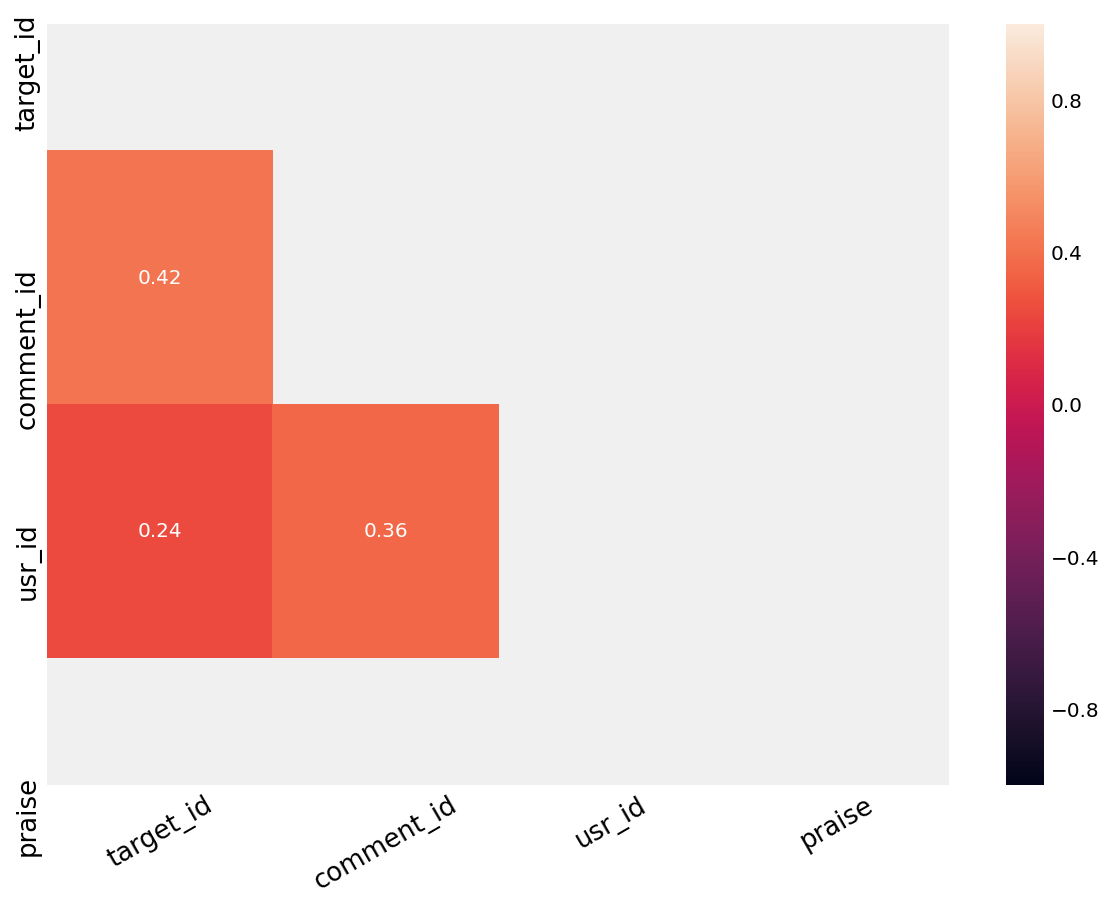

,target_id,comment_id,usr_id,praise
count,6281.00000,6281.00000,6281.00000,6281.0
mean,8640.88839,4718.68206,30098.58223,1.0
std,2449.56906,4194.67910,14548.67192,0.0
min,207.00000,1.00000,304.00000,1.0
25%,7017.00000,1287.00000,18697.00000,1.0
50%,9312.00000,3348.00000,31641.00000,1.0
75%,9620.00000,6877.00000,41777.00000,1.0
max,15129.00000,16632.00000,54967.00000,1.0


,target_id,comment_id,usr_id,create_time,praise
0,465,1,304,2017-09-12 10:24:16,1
1,465,1,309,2017-09-13 10:31:09,1
2,465,1,314,2017-10-27 07:59:42,1
3,463,2,304,2017-09-12 10:23:58,1
4,469,3,311,2017-10-10 11:54:23,1


,target_id,comment_id,usr_id,create_time,praise
6276,10201,16535,52670,2019-03-21 14:33:22,1
6277,13780,16557,54885,2019-03-22 12:02:50,1
6278,5773,16591,10587,2019-03-24 03:06:32,1
6279,9889,16617,54955,2019-03-25 10:21:49,1
6280,9207,16632,54818,2019-03-26 15:30:24,1


In [53]:
data_glimps(words_video_comment_praise)

In [54]:
col_unique_values(words_video_comment_praise)

['target_id:926', 'comment_id:2812', 'usr_id:2028', 'create_time:6277', 'praise:1']


In [55]:
# no null

# The same use as the last one, it proves which video is popular.

Shape: (22549, 7) 

Types:
 buyer_id                  int64
goods_item_id             int64
goods_item_snapshot_id    int64
status                    int64
pay_order_id              int64
author_id                 int64
vip_level                 int64
dtype: object 

isnull:
 buyer_id                  0
goods_item_id             0
goods_item_snapshot_id    0
status                    0
pay_order_id              0
author_id                 0
vip_level                 0
dtype: int64 

Columns_names:
 Index(['buyer_id', 'goods_item_id', 'goods_item_snapshot_id', 'status',
       'pay_order_id', 'author_id', 'vip_level'],
      dtype='object') 



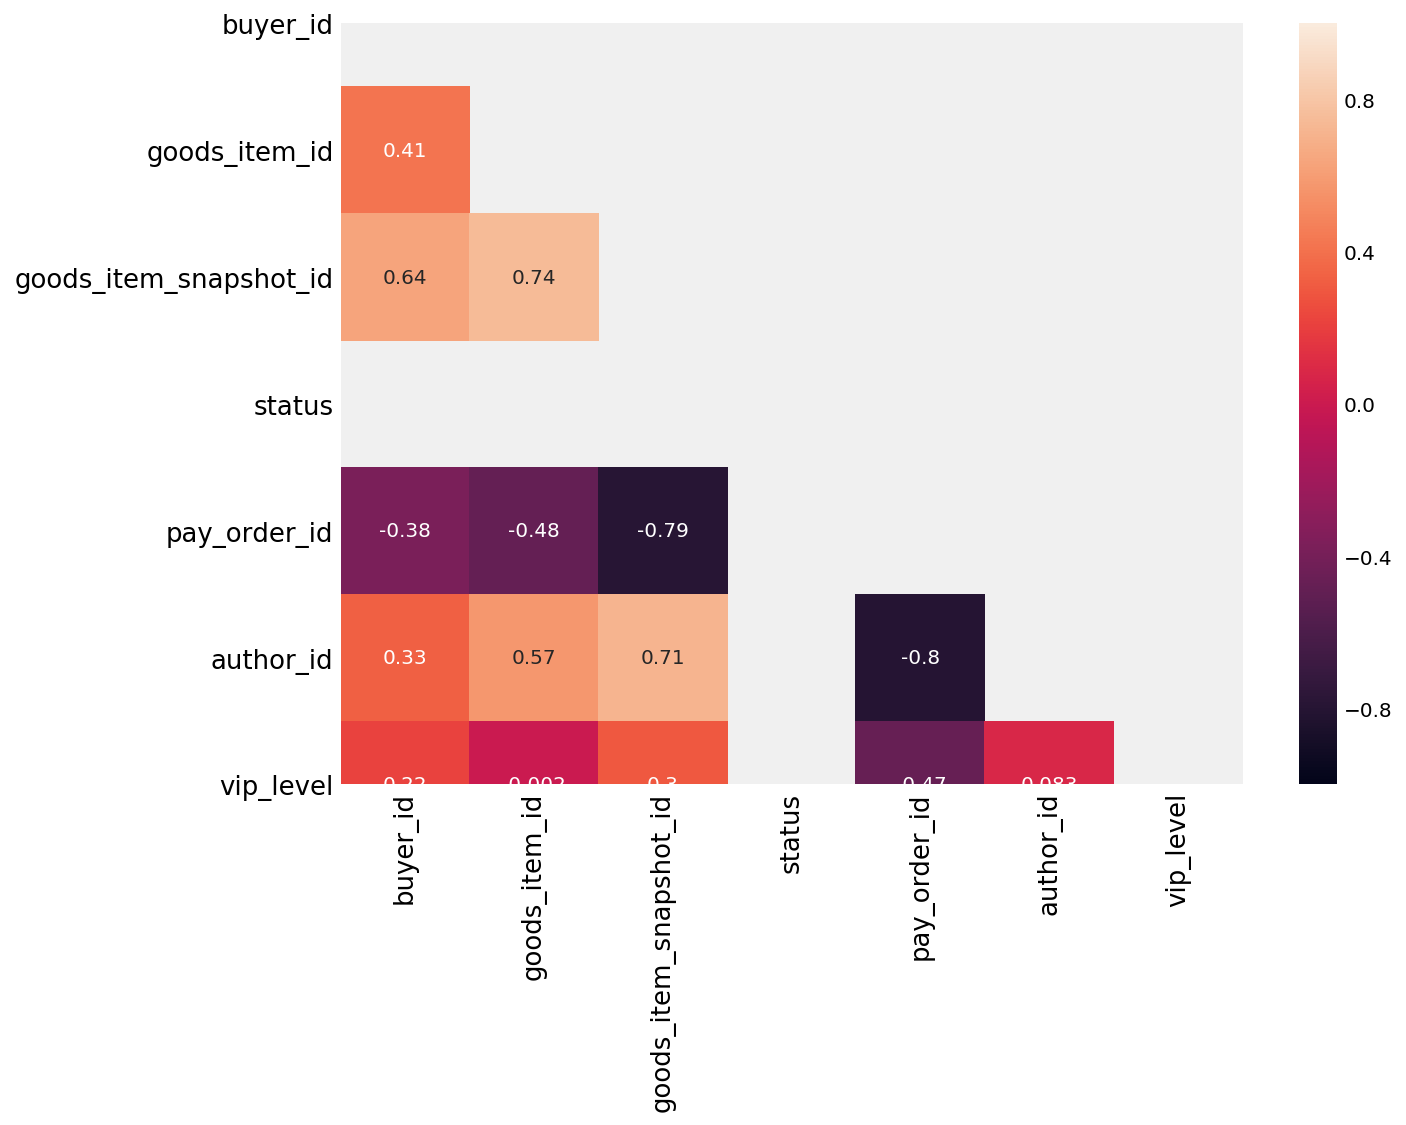

,buyer_id,goods_item_id,goods_item_snapshot_id,status,pay_order_id,author_id,vip_level
count,22549.00000,22549.00000,22549.00000,22549.0,22549.00000,22549.00000,22549.00000
mean,15674.38667,66.75418,894.80687,2.0,476824.52747,1822.79866,0.32370
std,13506.60755,97.71946,316.09737,0.0,136578.85630,7942.40405,2.38271
min,304.00000,14.00000,374.00000,2.0,0.00000,0.00000,0.00000
25%,5296.00000,29.00000,770.00000,2.0,506882.00000,0.00000,0.00000
50%,9433.00000,45.00000,811.00000,2.0,513340.00000,0.00000,0.00000
75%,24215.00000,65.00000,919.00000,2.0,523151.00000,0.00000,0.00000
max,54948.00000,515.00000,1938.00000,2.0,536436.00000,43694.00000,20.00000


,buyer_id,goods_item_id,goods_item_snapshot_id,status,pay_order_id,author_id,vip_level
0,304,17,565,2,502886,0,0
1,304,19,777,2,508783,0,0
2,304,23,554,2,502582,0,0
3,304,24,567,2,502987,0,0
4,304,25,637,2,504282,0,0


,buyer_id,goods_item_id,goods_item_snapshot_id,status,pay_order_id,author_id,vip_level
22544,54818,512,1930,2,0,42135,0
22545,54857,69,1921,2,0,34129,1
22546,54891,510,1914,2,536351,0,0
22547,54891,513,1918,2,536352,0,0
22548,54948,510,1914,2,0,42134,0


In [56]:
data_glimps(subscribed_video_package)

In [57]:
col_unique_values(subscribed_video_package)

['buyer_id:7577', 'goods_item_id:55', 'goods_item_snapshot_id:307', 'status:1', 'pay_order_id:20846', 'author_id:10', 'vip_level:5']


In [58]:
subscribed_video_package.goods_item_id.value_counts().head()

29    1571
69    1553
23    1188
57    1098
26    1073
Name: goods_item_id, dtype: int64

In [59]:
# no null

#  On average, each buyer_id subscribed on 3 items

# Not sure what goods_item_snapshot_id stands for.

Shape: (184266, 6) 

Types:
 id                  int64
word_id             int64
video_id            int64
video_package_id    int64
bind_time           int64
flag                int64
dtype: object 

isnull:
 id                  0
word_id             0
video_id            0
video_package_id    0
bind_time           0
flag                0
dtype: int64 

Columns_names:
 Index(['id', 'word_id', 'video_id', 'video_package_id', 'bind_time', 'flag'], dtype='object') 



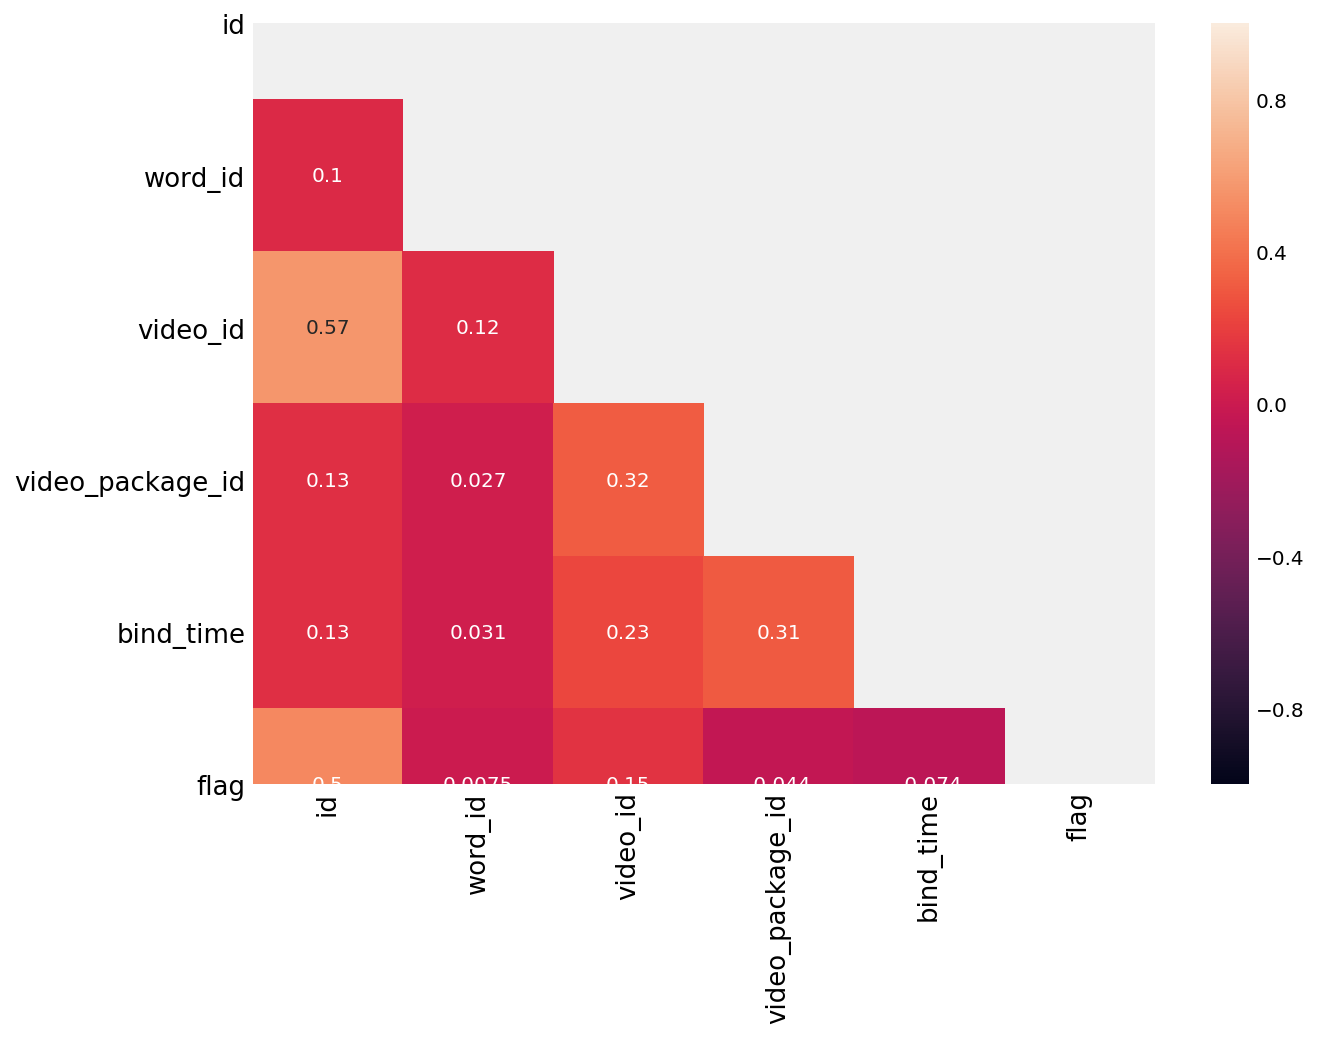

,id,word_id,video_id,video_package_id,bind_time,flag
count,184266.00000,184266.00000,184266.00000,184266.00000,1.84266e+05,184266.00000
mean,652111.62103,94547.65625,8783.04902,55.37232,3.74862e+05,0.04097
std,188220.49941,53390.18715,3705.47722,119.22302,6.73133e+05,0.57047
min,270.00000,1.00000,187.00000,0.00000,0.00000e+00,-1.00000
25%,651324.25000,48066.00000,6962.00000,0.00000,3.53650e+03,0.00000
50%,697611.50000,94495.00000,9742.00000,0.00000,7.06750e+04,0.00000
75%,743680.75000,139767.00000,11667.00000,70.00000,3.13646e+05,0.00000
max,808233.00000,188625.00000,15130.00000,515.00000,5.42082e+06,2.00000


,id,word_id,video_id,video_package_id,bind_time,flag
0,270,28618,203,0,24323,-1
1,271,34180,203,0,79218,-1
2,272,43526,203,0,17116,-1
3,273,82194,203,0,62001,-1
4,274,105633,203,0,34090,-1


,id,word_id,video_id,video_package_id,bind_time,flag
184261,808229,43989,15130,0,76725,0
184262,808230,188625,15130,0,79975,0
184263,808231,131594,15130,0,83950,0
184264,808232,178488,15130,0,99400,0
184265,808233,64622,15130,0,106950,0


In [60]:
data_glimps(r_word_video)

In [61]:
col_unique_values(r_word_video)

['id:184266', 'word_id:33928', 'video_id:14519', 'video_package_id:53', 'bind_time:51216', 'flag:3']


In [62]:
# no null

# There are 33928 words and 14519 videos in our database.

# In total, users have used our "review vocabularies" app function for 184266 times.

In [63]:
pmsg_bind_account = pmsg_bind_account[['user_id','device_type']]

Shape: (52776, 2) 

Types:
 user_id        int64
device_type    int64
dtype: object 

isnull:
 user_id        0
device_type    0
dtype: int64 

Columns_names:
 Index(['user_id', 'device_type'], dtype='object') 



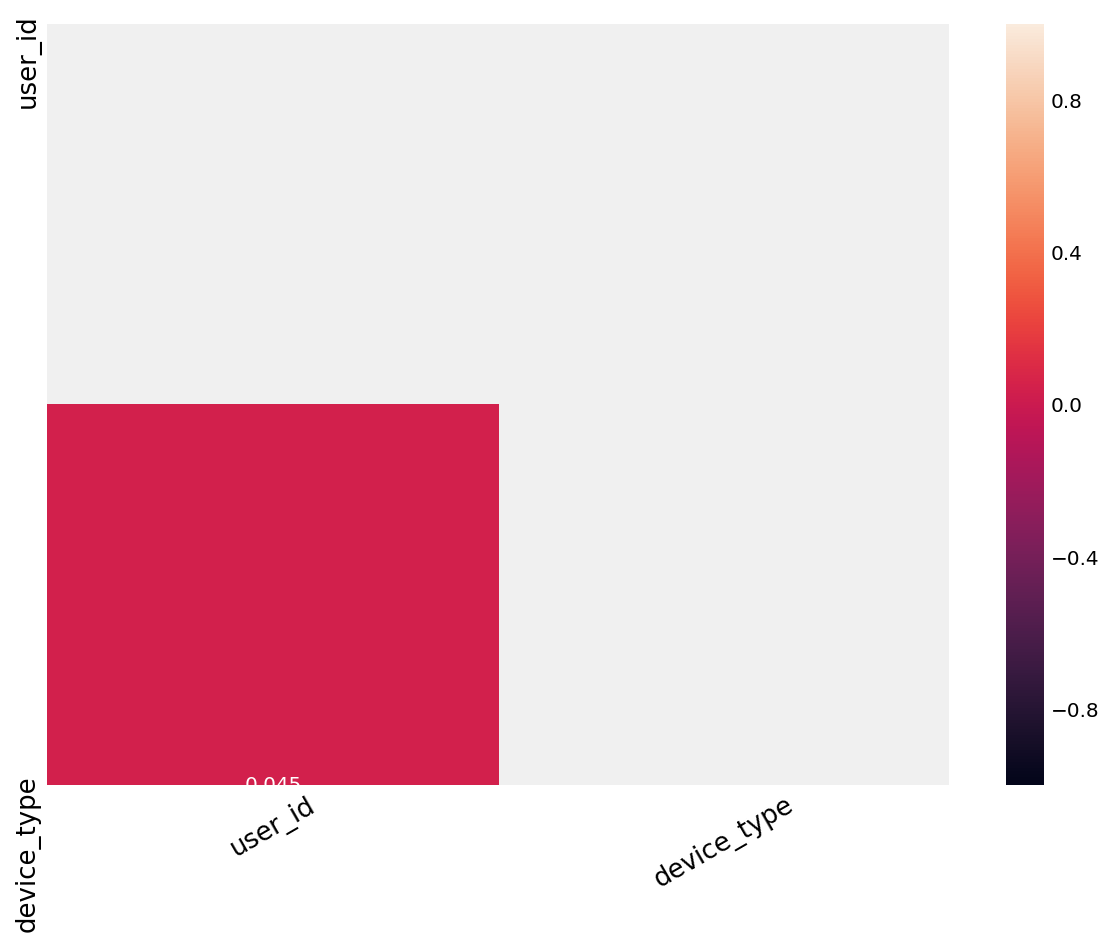

,user_id,device_type
count,52776.00000,52776.00000
mean,27762.56984,3.10175
std,15586.69359,0.30232
min,303.00000,3.00000
25%,14305.75000,3.00000
50%,27728.50000,3.00000
75%,41192.25000,3.00000
max,55006.00000,4.00000


,user_id,device_type
0,303,3
1,304,4
2,304,4
3,306,3
4,309,4


,user_id,device_type
52771,55002,3
52772,55003,4
52773,55004,4
52774,55005,3
52775,55006,3


In [64]:
data_glimps(pmsg_bind_account)

In [65]:
pmsg_bind_account.device_type.value_counts()

3    47406
4     5370
Name: device_type, dtype: int64

In [66]:
# for user_info:
# 3 stands for android device, 4 is ios device users

Shape: (60750, 7) 

Types:
 id                 int64
user_id            int64
type               int64
type_name         object
amount           float64
paid_amount      float64
recharge_time     object
dtype: object 

isnull:
 id               0
user_id          0
type             0
type_name        0
amount           0
paid_amount      0
recharge_time    0
dtype: int64 

Columns_names:
 Index(['id', 'user_id', 'type', 'type_name', 'amount', 'paid_amount',
       'recharge_time'],
      dtype='object') 



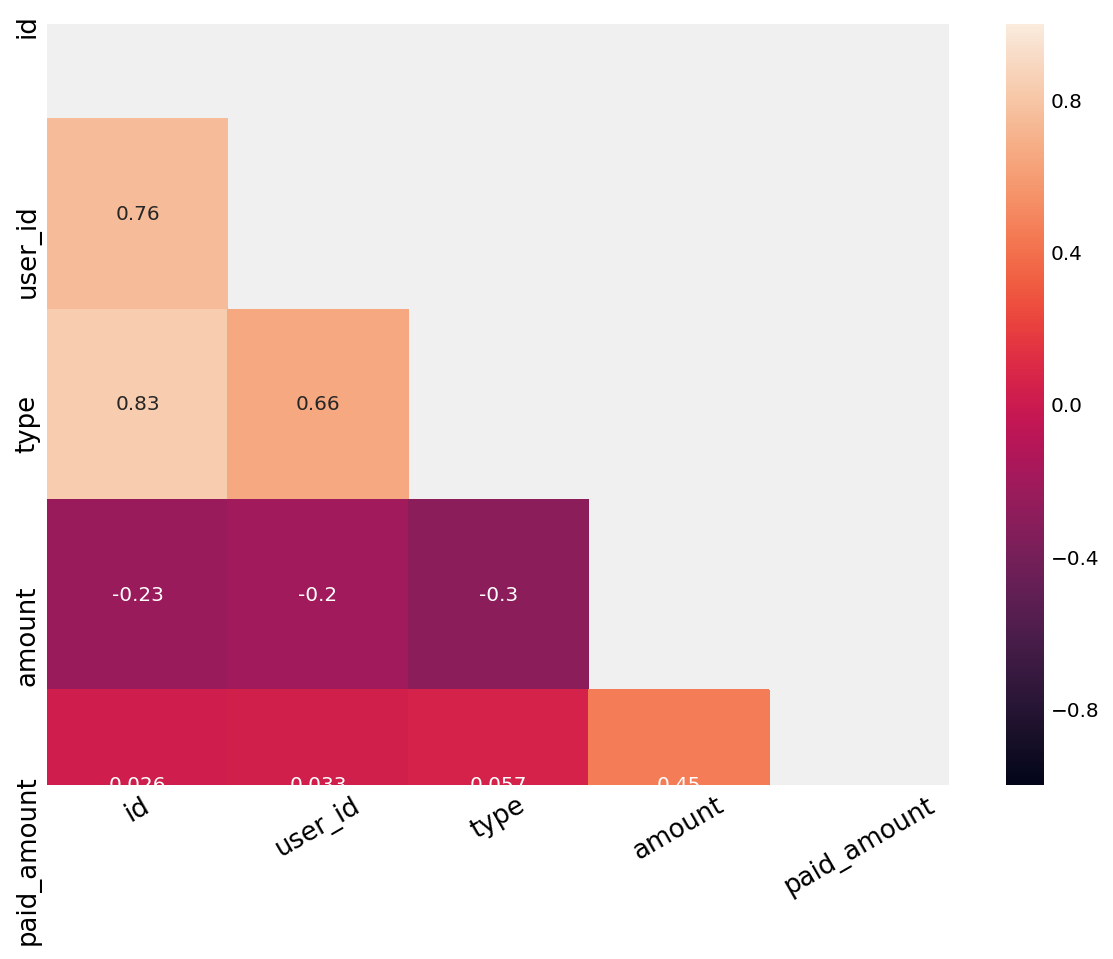

,id,user_id,type,amount,paid_amount
count,60750.00000,60750.00000,60750.00000,60750.00000,60750.00000
mean,30388.50000,25860.40091,2.20094,2.86764,0.05895
std,17537.15876,15551.32321,1.45225,4.21865,1.99463
min,14.00000,304.00000,1.00000,1.00000,0.00000
25%,15201.25000,12338.00000,1.00000,1.00000,0.00000
50%,30388.50000,23536.00000,1.00000,1.00000,0.00000
75%,45575.75000,39983.00000,4.00000,2.00000,0.00000
max,60763.00000,55006.00000,5.00000,208.00000,208.00000


,id,user_id,type,type_name,amount,paid_amount,recharge_time
0,14,304,1,...,1.0,0.0,2017-07-17 11:26:56
1,15,2525,1,...,1.0,0.0,2017-07-17 17:36:50
2,16,2133,1,...,1.0,0.0,2017-07-17 17:53:27
3,17,2260,1,...,1.0,0.0,2017-07-17 22:13:43
4,18,2542,1,...,1.0,0.0,2017-07-17 23:31:54


,id,user_id,type,type_name,amount,paid_amount,recharge_time
60745,60759,35850,4,...,1.0,0.0,2019-03-27 14:16:34
60746,60760,51313,4,...,1.0,0.0,2019-03-27 14:21:48
60747,60761,54218,4,...,1.0,0.0,2019-03-27 14:37:38
60748,60762,7701,4,...,1.0,0.0,2019-03-27 14:45:57
60749,60763,51541,4,...,1.0,0.0,2019-03-27 15:02:08


In [67]:
data_glimps(pay_recharge_log)

In [68]:
col_unique_values(pay_recharge_log)

['id:60750', 'user_id:10701', 'type:5', 'type_name:1', 'amount:12', 'paid_amount:7', 'recharge_time:59729']


In [69]:
len(pay_recharge_log[pay_recharge_log['paid_amount']!=0])

126

In [70]:
sum(pay_recharge_log[pay_recharge_log['paid_amount']!=0].paid_amount)

3581.0

In [71]:
# Without promotion，the natural purchase rate close to 1%.

Shape: (49172, 6) 

Types:
 id               int64
reg_time        object
mobile_phone     int64
province        object
city            object
sp              object
dtype: object 

isnull:
 id                 0
reg_time           0
mobile_phone       0
province          27
city            4229
sp                27
dtype: int64 

Columns_names:
 Index(['id', 'reg_time', 'mobile_phone', 'province', 'city', 'sp'], dtype='object') 



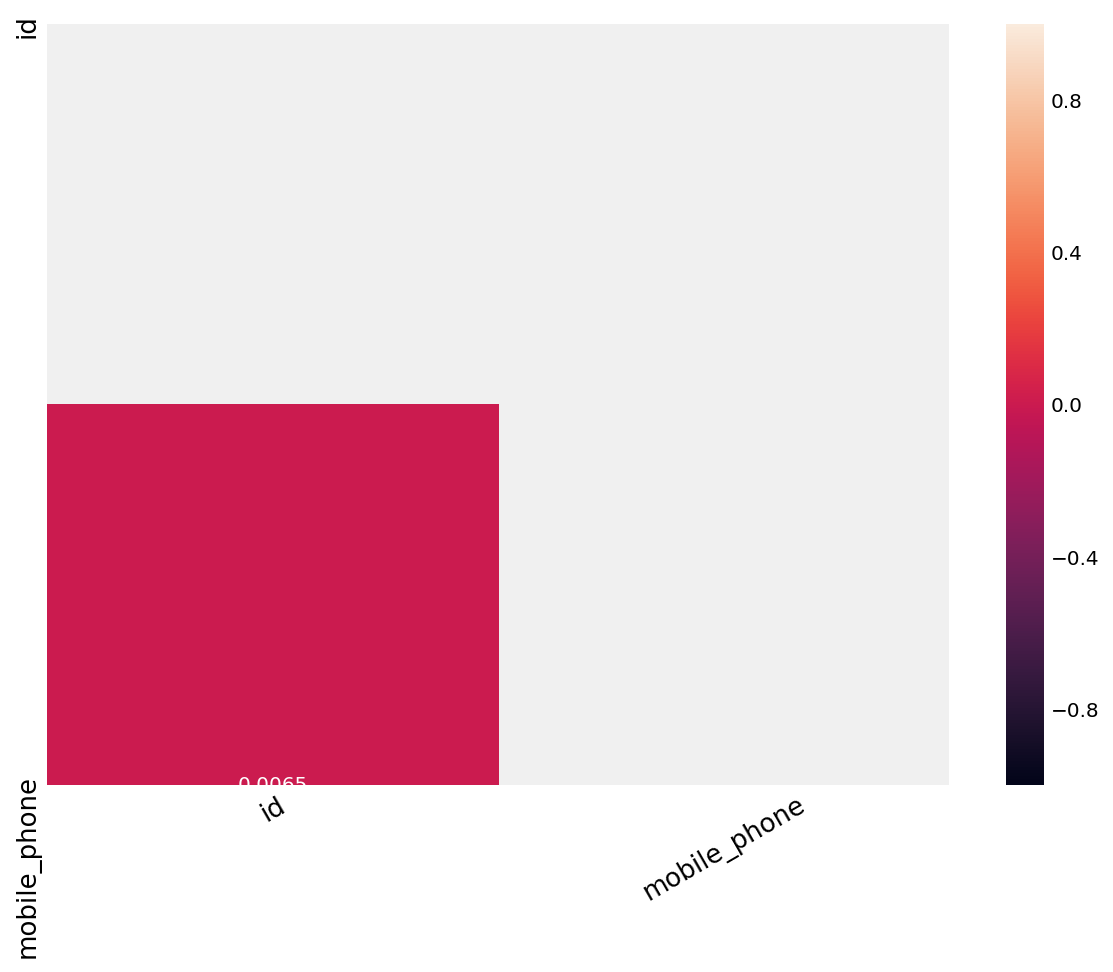

,id,mobile_phone
count,49172.00000,4.91720e+04
mean,24586.50000,1.62841e+10
std,14194.87806,2.01931e+09
min,1.00000,1.30010e+10
25%,12293.75000,1.50082e+10
50%,24586.50000,1.58703e+10
75%,36879.25000,1.82742e+10
max,49172.00000,1.99998e+10


,id,reg_time,mobile_phone,province,city,sp
0,1,2017-08-01 09:11:57,18961862896,江苏,无锡,电信
1,2,2017-08-01 12:26:07,13531634632,广东,惠州,移动
2,3,2017-08-01 12:37:06,15851724042,江苏,淮安,移动
3,4,2017-08-01 16:06:28,15208058297,西藏,昌都,移动
4,5,2017-08-01 19:14:26,17776379659,广西,贵港,电信


,id,reg_time,mobile_phone,province,city,sp
49167,49168,2019-03-18 21:50:32,17707145160,湖北,黄石,电信
49168,49169,2019-03-18 22:59:05,15172985797,湖北,恩施,移动
49169,49170,2019-03-18 23:03:36,15189083135,江苏,宿迁,移动
49170,49171,2019-03-18 23:27:27,13114955937,天津,NaN,联通
49171,49172,2019-03-18 23:49:06,13211056823,广东,肇庆,联通


In [72]:
data_glimps(mobilephone_stats)

In [73]:
col_unique_values(mobilephone_stats)

['id:49172', 'reg_time:49015', 'mobile_phone:49172', 'province:34', 'city:376', 'sp:16']


In [74]:
mobilephone_stats.sp.value_counts().head()

移动      30860
联通      10426
电信       7835
阿里通信        5
民生电子        3
Name: sp, dtype: int64

In [75]:
mobilephone_stats.province.value_counts().head(10)

山东    3610
广东    3485
四川    3298
河南    3215
湖南    2919
江苏    2604
山西    2119
浙江    1959
河北    1949
安徽    1907
Name: province, dtype: int64

In [76]:
mobilephone_stats.city.value_counts().head(10)

成都    1482
西安     894
长沙     892
郑州     824
武汉     810
广州     758
济南     678
南京     667
青岛     586
深圳     585
Name: city, dtype: int64

In [77]:
date_info(mobilephone_stats,'reg_time')

In [78]:
mobilephone_stats.head()

,id,reg_time,mobile_phone,province,city,sp,year,month,day_of_week,hour,year_month
0,1,2017-08-01 09:11:57,18961862896,江苏,无锡,电信,2017,8,Tuesday,9,2017_8
1,2,2017-08-01 12:26:07,13531634632,广东,惠州,移动,2017,8,Tuesday,12,2017_8
2,3,2017-08-01 12:37:06,15851724042,江苏,淮安,移动,2017,8,Tuesday,12,2017_8
3,4,2017-08-01 16:06:28,15208058297,西藏,昌都,移动,2017,8,Tuesday,16,2017_8
4,5,2017-08-01 19:14:26,17776379659,广西,贵港,电信,2017,8,Tuesday,19,2017_8


In [79]:
hourofday_stats = mobilephone_stats.hour.value_counts()

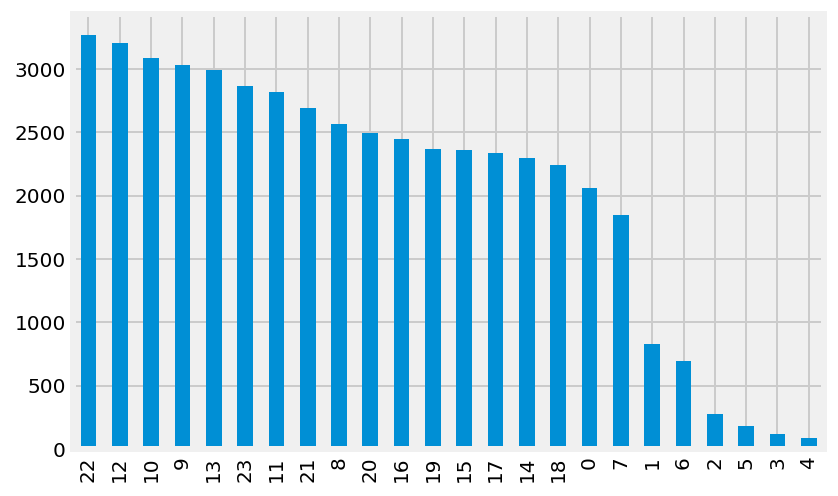

In [80]:
hourofday_stats.plot(kind="bar")

In [81]:
dayofweek_stats = mobilephone_stats.day_of_week.value_counts()

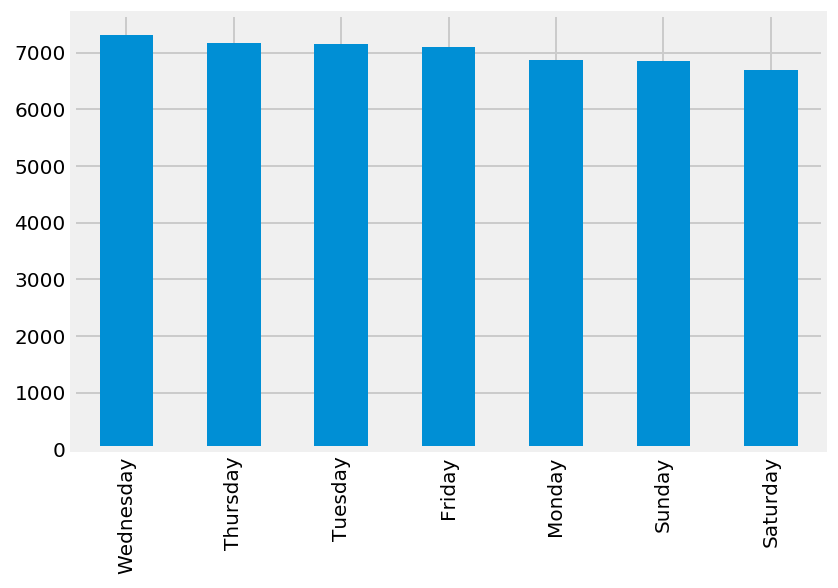

In [82]:
dayofweek_stats.plot(kind="bar");

In [83]:
year_stats=mobilephone_stats.year.value_counts()

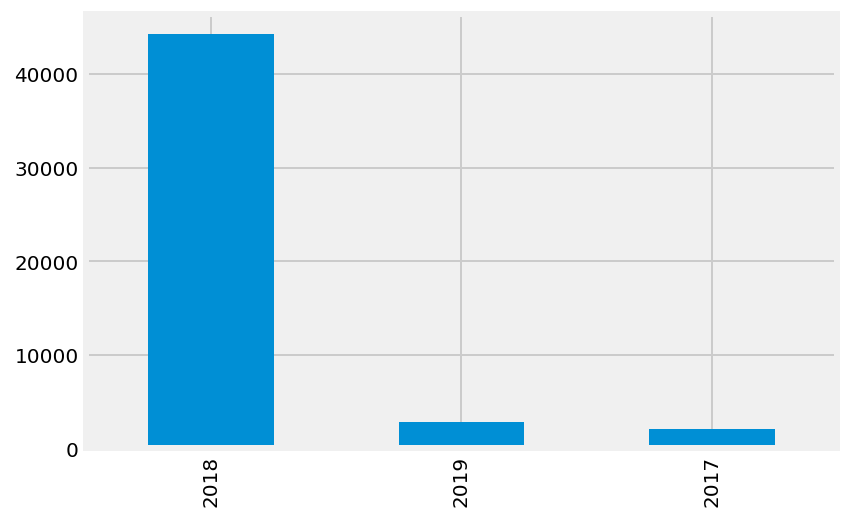

In [84]:
year_stats.plot(kind="bar")

In [85]:
yearmonth_stats=mobilephone_stats.year_month.value_counts()

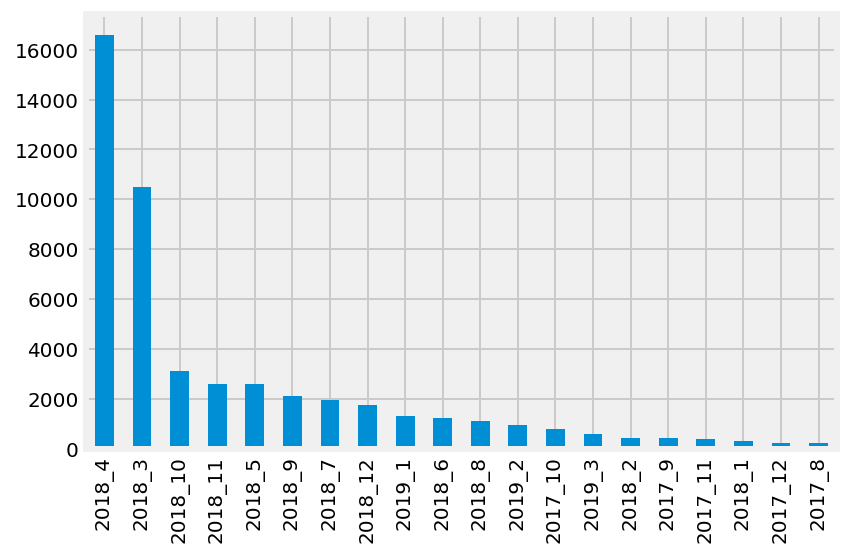

In [86]:
yearmonth_stats.plot(kind='bar')

In [87]:
# be aware, there are nulls 

# for user_info:
# mobilephone_stats can contribute a lot for user_info analysis


Shape: (5615, 5) 

Types:
 id                 int64
user_id            int64
day                int64
total_day          int64
last_sign_time    object
dtype: object 

isnull:
 id                0
user_id           0
day               0
total_day         0
last_sign_time    0
dtype: int64 

Columns_names:
 Index(['id', 'user_id', 'day', 'total_day', 'last_sign_time'], dtype='object') 



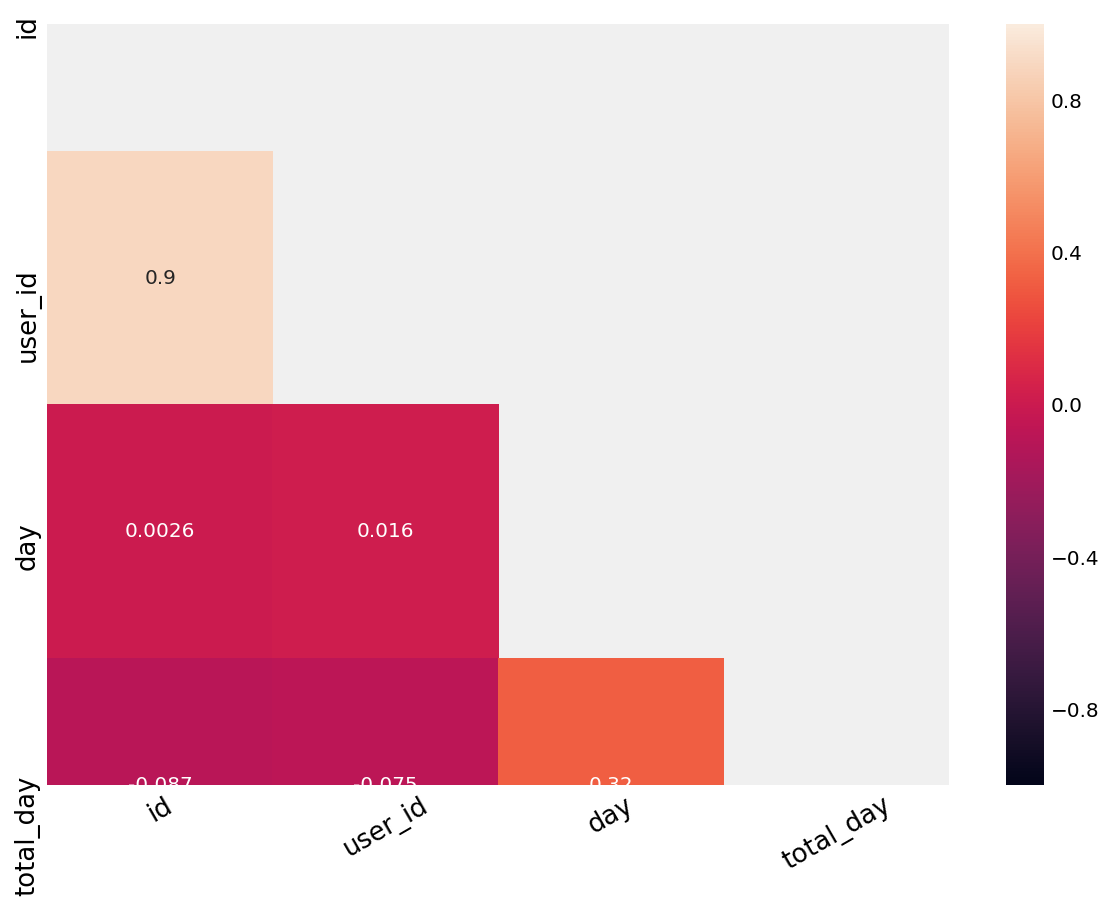

,id,user_id,day,total_day
count,5615.00000,5615.00000,5615.00000,5615.00000
mean,2813.00000,18515.26055,2.85272,6.51167
std,1621.05521,10275.37578,4.15249,15.01536
min,6.00000,304.00000,2.00000,1.00000
25%,1409.50000,10048.00000,2.00000,1.00000
50%,2813.00000,17453.00000,2.00000,2.00000
75%,4216.50000,26118.50000,2.00000,4.00000
max,5620.00000,40432.00000,130.00000,372.00000


,id,user_id,day,total_day,last_sign_time
0,6,304,2,40,2018-03-09 17:34:27
1,7,2525,2,16,2017-08-05 22:47:23
2,8,2133,2,2,2017-07-17 17:53:27
3,9,2260,2,2,2017-07-17 22:13:43
4,10,2542,3,3,2017-07-18 23:13:26


,id,user_id,day,total_day,last_sign_time
5610,5616,40414,2,1,2018-07-26 12:36:24
5611,5617,40361,2,1,2018-07-26 12:50:24
5612,5618,40137,2,1,2018-07-26 13:42:56
5613,5619,39983,2,1,2018-07-26 14:05:56
5614,5620,40432,2,1,2018-07-26 14:10:12


In [88]:
data_glimps(daily_sign)

In [89]:
col_unique_values(daily_sign)

['id:5615', 'user_id:5615', 'day:36', 'total_day:106', 'last_sign_time:5615']


In [90]:
daily_sign.day.unique()

array([  2,   3,   6,   8,   5,   4,  40,   9,  10,  11,  12,  14,  27,
        23,  41,  15,  24,  21,  48,  17,  30,  53, 104,  39,  20,  16,
        22,  18,  32,  36,  44, 130,  68, 111,  26,  47])

In [91]:
daily_sign.total_day.unique() 

array([ 40,  16,   2,   3,   6,  11, 122,  25,   5, 229,   4,  54,  10,
        13,  18, 372,  20,  14,  55,  72,  12, 285,   8,   7,  50,  29,
        33,  21,  52,  83,  28,  15,   9,  30,  80,  56,  38,  39,  17,
        22,  27,  60,  31,  71,  24,  43,  64,  84,  74,  41,  48,  82,
        35,  44,   1, 114,  75,  19,  49, 197,  23,  26,  34,  47,  32,
        78,  66, 104,  42,  61,  68,  58, 113, 118,  88, 123,  89,  69,
        65,  96, 115,  73,  53,  57,  46,  86,  45,  36,  76, 120,  37,
       101,  70, 108,  79,  87, 107,  67,  59,  63,  81,  62,  77,  90,
        93,  51])

In [92]:
len(daily_sign[daily_sign['total_day']>7])/5615

0.18308103294746214

In [93]:
last_login_time=daily_sign[['id','last_sign_time']]

In [94]:
def date_info(dataset,col_str):
    dataset[col_str]=pd.to_datetime(dataset[col_str])
    dataset['year']=dataset[col_str].dt.year
    dataset['month']=dataset[col_str].dt.month
    dataset['day_of_week']=dataset[col_str].dt.weekday_name
    dataset['hour']=dataset[col_str].dt.hour
    dataset['year_month']=[str(i)+'_'+str(j) for i,j in zip(dataset['year'], dataset['month'])]

In [95]:
date_info(last_login_time, 'last_sign_time')

In [96]:
last_login_time.head()

,id,last_sign_time,year,month,day_of_week,hour,year_month
0,6,2018-03-09 17:34:27,2018,3,Friday,17,2018_3
1,7,2017-08-05 22:47:23,2017,8,Saturday,22,2017_8
2,8,2017-07-17 17:53:27,2017,7,Monday,17,2017_7
3,9,2017-07-17 22:13:43,2017,7,Monday,22,2017_7
4,10,2017-07-18 23:13:26,2017,7,Tuesday,23,2017_7


In [97]:
# the next 6 cells are comparing last_login_time with the previous mobilephone_stats
last_login_time.year_month.value_counts().head()

2018_4    2253
2018_3    1236
2018_5     736
2018_6     436
2018_7     417
Name: year_month, dtype: int64

In [98]:
mobilephone_stats.year_month.value_counts().head()

2018_4     16609
2018_3     10494
2018_10     3100
2018_11     2580
2018_5      2578
Name: year_month, dtype: int64

In [99]:
last_login_time.day_of_week.value_counts().head()

Thursday     852
Tuesday      846
Wednesday    832
Friday       796
Sunday       779
Name: day_of_week, dtype: int64

In [100]:
mobilephone_stats.day_of_week.value_counts().head()

Wednesday    7314
Thursday     7179
Tuesday      7160
Friday       7104
Monday       6866
Name: day_of_week, dtype: int64

In [101]:
last_login_time.hour.value_counts().head()

22    408
23    391
8     378
9     378
12    355
Name: hour, dtype: int64

In [102]:
mobilephone_stats.hour.value_counts().head()

22    3270
12    3206
10    3085
9     3032
13    2992
Name: hour, dtype: int64

In [103]:
# no null

# user_info:
# I think it's the most convincing data for study user behaviour


In [104]:
ad_lesson_video[ad_lesson_video['id']==9273]

,id,duration,last_modified,title,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
8822,9273,247,2018-03-01 00:00:00,无厘头恶搞戏中戏《不要随便给女朋友惊喜》,0,277292,1,277735,0,22479.712,28738,3927,39803


Shape: (14537, 13) 

Types:
 id                       int64
duration                 int64
last_modified           object
title                   object
sort_index               int64
access_times             int64
access_type              int64
real_access_times        int64
direction                int64
popularity             float64
favorite_times           int64
real_favorite_times      int64
author_id                int64
dtype: object 

isnull:
 id                     0
duration               0
last_modified          0
title                  0
sort_index             0
access_times           0
access_type            0
real_access_times      0
direction              0
popularity             0
favorite_times         0
real_favorite_times    0
author_id              0
dtype: int64 

Columns_names:
 Index(['id', 'duration', 'last_modified', 'title', 'sort_index',
       'access_times', 'access_type', 'real_access_times', 'direction',
       'popularity', 'favorite_times', 'real_favor

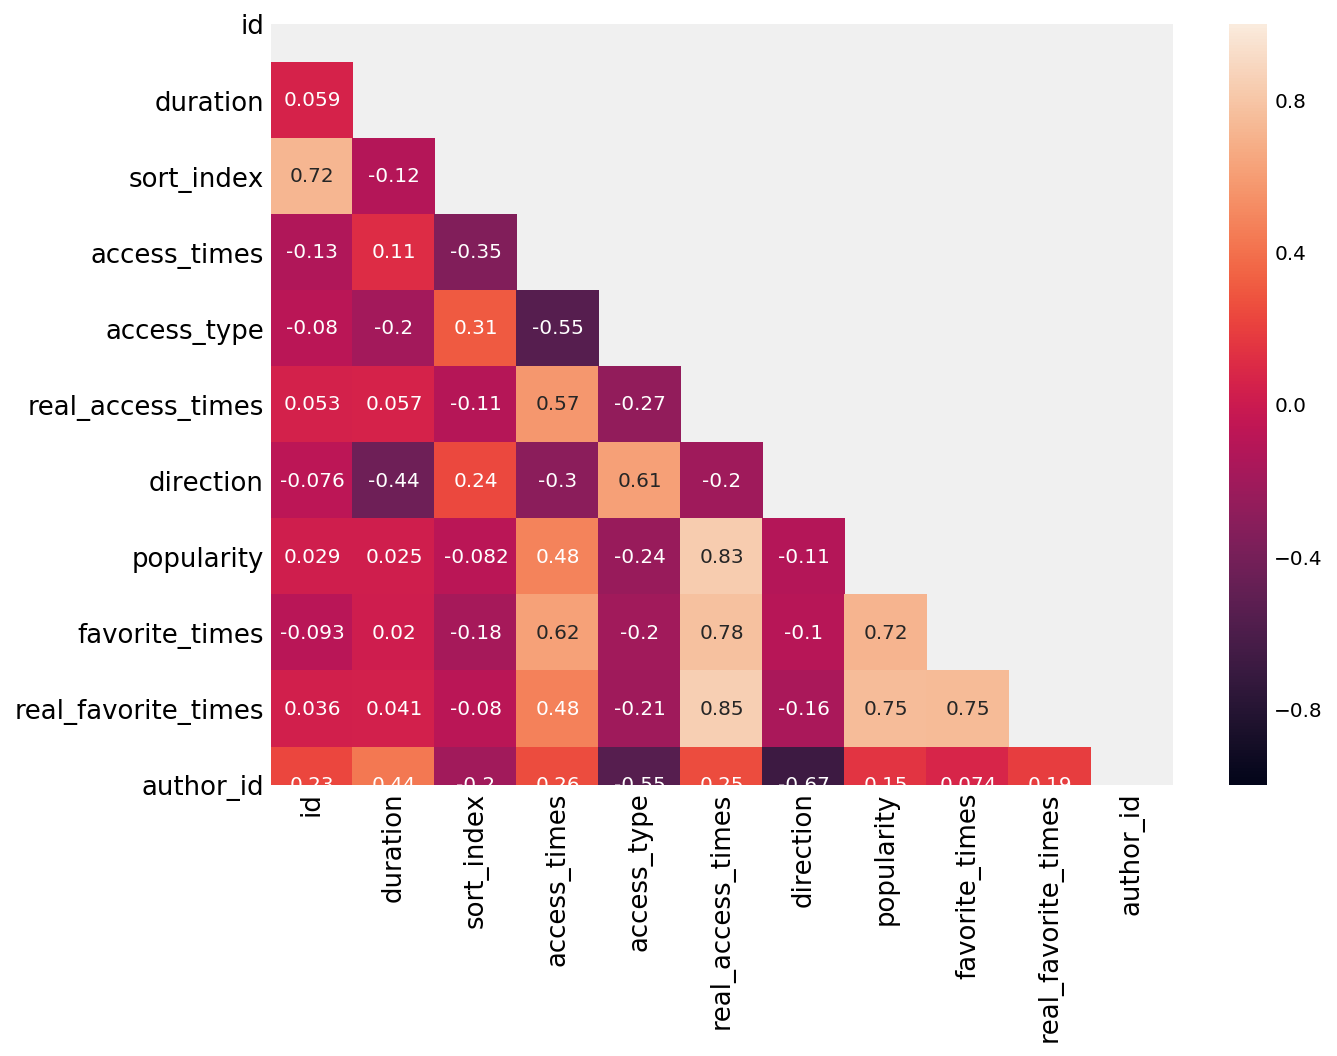

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000,14537.00000
mean,7707.11137,55.12836,0.28094,14957.04726,2.48449,1643.06528,0.87460,163.03835,1306.16200,17.40469,2832.01142
std,4293.06883,263.34594,0.44947,20540.39285,1.03717,9314.66714,0.33119,1234.79285,2336.24213,136.32906,8805.51278
min,187.00000,1.00000,0.00000,2153.00000,0.00000,0.00000,0.00000,0.00000,403.00000,0.00000,0.00000
25%,4008.00000,6.00000,0.00000,4638.00000,3.00000,10.00000,1.00000,0.00000,831.00000,0.00000,0.00000
50%,7713.00000,7.00000,0.00000,9306.00000,3.00000,50.00000,1.00000,2.18100,1190.00000,0.00000,0.00000
75%,11396.00000,10.00000,1.00000,13755.00000,3.00000,272.00000,1.00000,13.37500,1249.00000,1.00000,0.00000
max,15130.00000,5452.00000,1.00000,385131.00000,10.00000,385368.00000,1.00000,82040.25000,81294.00000,8607.00000,44892.00000


,id,duration,last_modified,title,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
0,187,123,2017-06-06 17:46:36,【自制】吓坏老外的高考,0,52527,0,701,0,15.687,1205,3,0
1,197,1060,2017-06-14 17:50:35,四级考前必背100词-3,0,18391,2,218,0,1.747,1123,0,0
2,198,961,2017-06-15 17:56:43,四级考前必背100词-4,0,23360,2,232,0,1.052,1176,0,0
3,200,1627,2017-06-19 19:46:57,占据高频考点的社会单词,0,26218,1,2235,0,120.498,1233,26,0
4,203,107,2017-06-15 17:51:36,【自制】走过最长的路就是网购折扣中的套路,0,20970,0,470,0,76.547,1115,4,0


,id,duration,last_modified,title,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
14532,15126,114,2018-11-08 15:26:34,4岁小妹妹反思新年计划,0,25743,0,25769,1,2769.835,2293,329,5472
14533,15127,108,2018-11-08 15:26:13,被最毒的蜘蛛咬伤怎么办？,0,14354,0,14355,0,689.303,899,75,5472
14534,15128,130,2018-11-08 15:27:59,可爱小孩回答什么是爱？,0,19149,0,19129,0,1027.842,1266,151,5472
14535,15129,55,2018-11-08 15:29:14,一枚回形针,0,46167,0,46162,0,1887.447,1188,157,5472
14536,15130,110,2018-11-08 15:30:26,怎么和宝宝乘飞机？,0,24486,0,24483,0,1268.913,980,98,5472


In [105]:
data_glimps(ad_lesson_video)

In [106]:
col_unique_values(ad_lesson_video)

['id:14537', 'duration:541', 'last_modified:14485', 'title:14528', 'sort_index:2', 'access_times:8105', 'access_type:5', 'real_access_times:2872', 'direction:2', 'popularity:5116', 'favorite_times:1863', 'real_favorite_times:367', 'author_id:52']


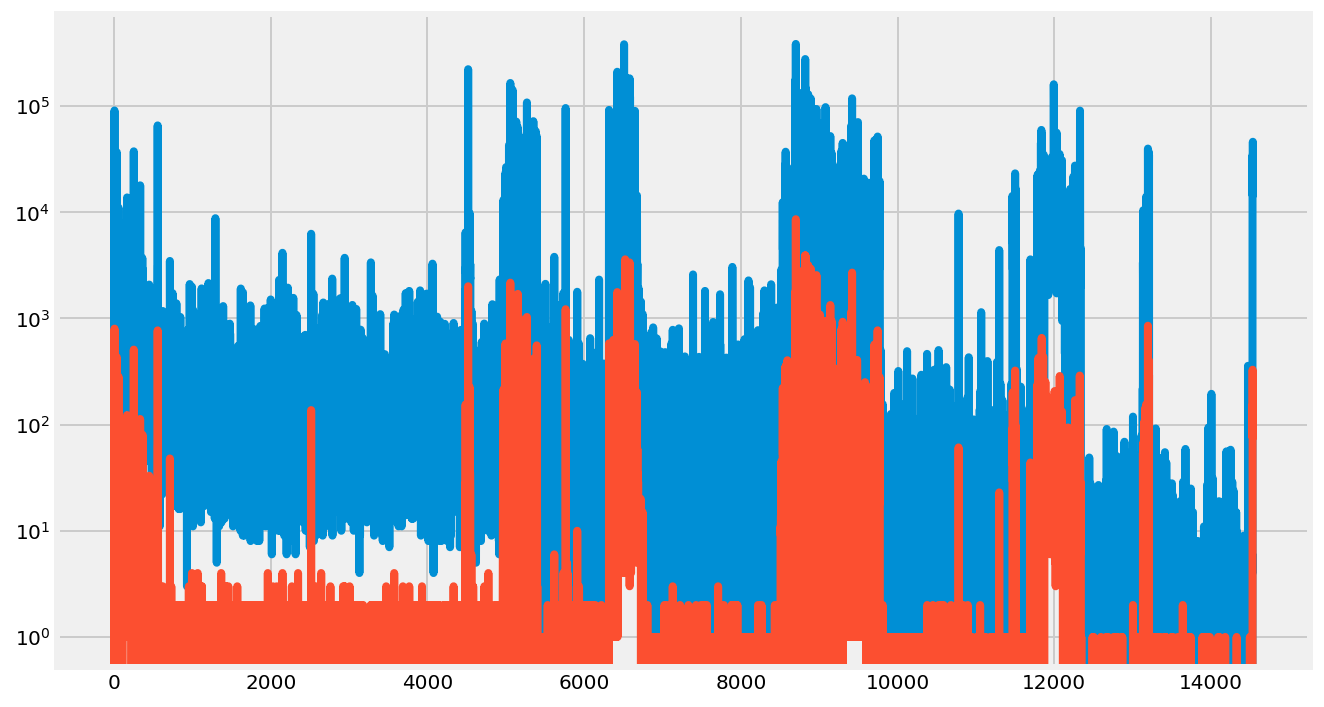

In [107]:
fig,ax=plt.subplots(figsize=(10,6))
line1=ax.plot(ad_lesson_video['real_access_times'])
line2=ax.plot(ad_lesson_video['real_favorite_times'])
ax.set_yscale('log')
# ax.set_xscale('log')

In [108]:
ad_lesson_video[ad_lesson_video['real_access_times']>1643].describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,2034.00000,2034.00000,2034.0,2034.00000,2034.00000,2034.00000,2034.00000,2034.00000,2034.00000,2034.00000,2034.00000
mean,9628.47394,166.55211,0.0,45861.54523,0.62439,10981.39774,0.38987,1120.86082,2917.14651,119.53835,16672.67994
std,2964.02114,336.06741,0.0,37024.34556,0.78005,22772.09484,0.48784,3135.60820,5947.95845,347.45147,15754.85202
min,200.00000,4.00000,0.0,6690.00000,0.00000,1644.00000,0.00000,3.54200,457.00000,0.00000,0.00000
25%,9082.50000,48.00000,0.0,21959.00000,0.00000,3059.00000,0.00000,195.89500,977.00000,23.00000,5471.00000
50%,9806.50000,114.00000,0.0,33269.50000,1.00000,5057.50000,0.00000,354.19050,1316.50000,46.00000,5472.00000
75%,12432.75000,183.00000,0.0,47182.75000,1.00000,9643.00000,1.00000,808.86375,2114.75000,94.00000,39798.00000
max,15130.00000,5452.00000,0.0,385131.00000,10.00000,385368.00000,1.00000,82040.25000,81294.00000,8607.00000,44892.00000


In [109]:
ad_lesson_video[ad_lesson_video['real_access_times']>10000].describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,485.00000,485.00000,485.0,485.00000,485.00000,485.00000,485.00000,485.00000,485.00000,485.00000,485.00000
mean,9764.55876,146.39381,0.0,62490.53196,0.53814,31844.97526,0.41856,3608.32887,6995.34639,362.62062,18062.72371
std,2555.16861,154.12712,0.0,50633.69143,0.91875,39884.21896,0.49383,5738.89608,10934.51927,652.24175,15827.98007
min,207.00000,4.00000,0.0,10213.00000,0.00000,10001.00000,0.00000,101.72900,604.00000,15.00000,0.00000
25%,9299.00000,30.00000,0.0,22155.00000,0.00000,13422.00000,0.00000,1017.92300,1371.00000,102.00000,5471.00000
50%,9574.00000,124.00000,0.0,36350.00000,0.00000,18769.00000,0.00000,1732.20000,2151.00000,173.00000,18013.00000
75%,12334.00000,214.00000,0.0,110789.00000,1.00000,30321.00000,1.00000,3697.83800,7954.00000,337.00000,39801.00000
max,15130.00000,1738.00000,0.0,385131.00000,10.00000,385368.00000,1.00000,82040.25000,81294.00000,8607.00000,44892.00000


In [110]:
ad_lesson_video[ad_lesson_video['real_access_times']>30000].describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,124.00000,124.00000,124.0,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000,124.00000
mean,8634.43548,117.30645,0.0,101687.43548,0.75806,74814.75806,0.55645,8884.26133,16294.60484,934.39516,13751.04839
std,2710.41543,121.99501,0.0,58613.49123,1.55323,60562.88519,0.49882,9160.63655,17112.16936,1094.43440,15475.89202
min,207.00000,4.00000,0.0,27345.00000,0.00000,30083.00000,0.00000,663.38500,974.00000,104.00000,0.00000
25%,6872.50000,14.00000,0.0,50547.00000,0.00000,37292.50000,0.00000,3868.74250,4578.00000,327.75000,411.00000
50%,9324.50000,73.50000,0.0,111401.50000,1.00000,53228.00000,1.00000,6802.78400,10567.00000,589.00000,5472.00000
75%,9606.50000,194.25000,0.0,117491.25000,1.00000,90807.75000,1.00000,10491.89650,22169.25000,1089.50000,18177.00000
max,15129.00000,634.00000,0.0,385131.00000,10.00000,385368.00000,1.00000,82040.25000,81294.00000,8607.00000,39816.00000


In [111]:
# no null

# for video_info:
# duration, real_access_times, real_favorite_times are usful columns

# popularity is a bit redundant. Will probably keep it in the final dataset, but haven't decide whether to use it or not.


In [112]:
# many vacabulary videos are quite short and within 15 seconds.
new_ad_lesson_video = ad_lesson_video[ad_lesson_video['duration']>15]

In [113]:
new_ad_lesson_video.reset_index(drop=True, inplace=True)

In [114]:
new_ad_lesson_video=new_ad_lesson_video[new_ad_lesson_video['real_access_times']<200000]

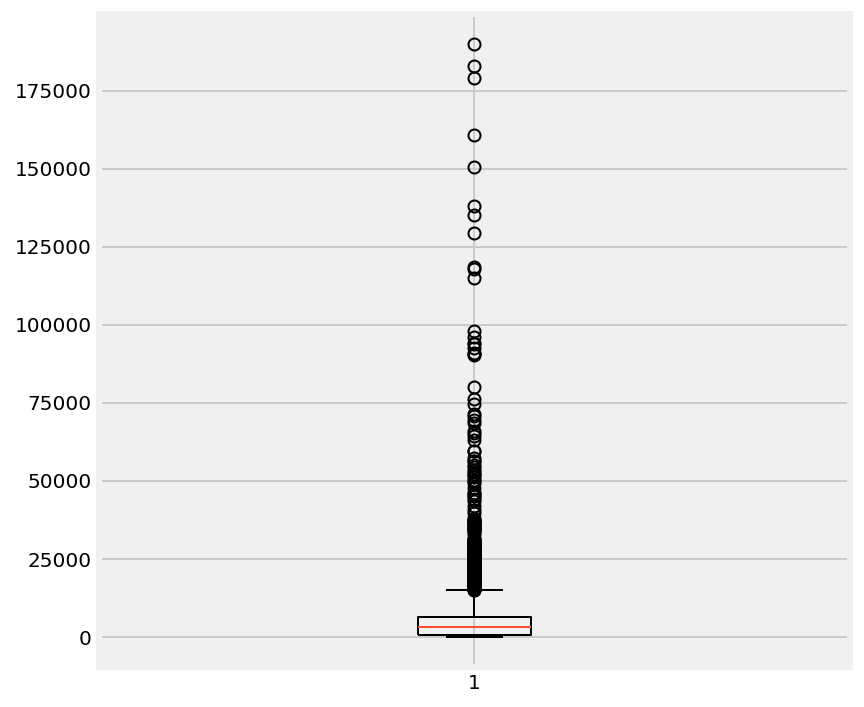

In [115]:
fig,ax=plt.subplots(figsize=(6,6))
ax = plt.boxplot(new_ad_lesson_video['real_access_times'])
# ax.set(yscale="log")
plt.show()

In [116]:
new_ad_lesson_video.describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,2633.00000,2633.00000,2633.0,2633.00000,2633.00000,2633.00000,2633.00000,2633.00000,2633.00000,2633.00000,2633.00000
mean,8523.10216,273.22788,0.0,34343.04140,0.79035,6528.73452,0.30915,561.02183,2079.03646,75.57691,15050.53551
std,3982.61704,569.95681,0.0,28111.55898,0.82474,13573.11304,0.46223,1501.99379,3812.81208,231.65029,15527.26828
min,187.00000,16.00000,0.0,3485.00000,0.00000,0.00000,0.00000,0.00000,453.00000,0.00000,0.00000
25%,6830.00000,69.00000,0.0,16481.00000,0.00000,732.00000,0.00000,48.56500,1022.00000,5.00000,1211.00000
50%,9590.00000,133.00000,0.0,27201.00000,1.00000,3106.00000,0.00000,186.14600,1242.00000,25.00000,5472.00000
75%,11999.00000,213.00000,0.0,37193.00000,1.00000,6475.00000,1.00000,472.05500,1618.00000,64.00000,34129.00000
max,15130.00000,5452.00000,0.0,189845.00000,10.00000,189935.00000,1.00000,24073.38000,76549.00000,3929.00000,44892.00000


In [117]:
boxplot_num(new_ad_lesson_video.real_access_times)

Above 15089.5 
 Q3 6475.0 
 Q2 3106.0 
 Q1 732.0 
 Below -7882.5


In [118]:
len(new_ad_lesson_video[new_ad_lesson_video['real_access_times']>15890])

229

In [119]:
len(new_ad_lesson_video[new_ad_lesson_video['real_access_times']<15890])

2404

In [120]:
new_ad_lesson_video[new_ad_lesson_video['real_access_times']>15890]

,id,duration,last_modified,title,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
6,207,272,2018-04-23 12:39:28,说走就走的“cede”「1/48」,0,109024,1,91026,0,7489.262,7376,802,1211
30,238,335,2018-07-20 10:30:09,最反转，最逆袭的“verse”「3/48」,0,110424,2,16964,0,1286.712,10368,319,1211
35,243,634,2018-04-23 18:21:30,大学四级场场必考词汇-TOP5「1/13」,0,108500,1,36850,0,2525.244,7115,433,1211
252,469,73,2018-07-19 14:33:11,重点词汇强调法「1/6」,0,112778,1,37529,0,3450.630,11120,509,1211
263,480,354,2018-04-26 11:30:22,考研英语第一弹——概述篇「1/12」,0,53124,1,16577,0,1045.564,1906,106,1211
334,557,88,2018-04-26 10:53:36,Hip hop这个名字是怎么来的？【The Art of Rap】「1/36」,0,108191,1,17943,0,794.976,2560,73,0
371,796,275,2018-03-01 00:00:00,贝克汉姆被遥控整蛊是什么样子,0,73583,1,65816,0,4108.645,5448,772,39799
435,5400,77,2018-03-01 00:00:00,Food for Good Clothes【Akanksha】,0,115056,2,23527,1,2126.874,28365,581,445
441,5408,64,2018-04-26 12:27:37,冒菜【Balint】,0,113202,1,26642,0,2145.711,14019,332,5466
489,5549,19,2018-03-27 11:40:39,Jokes-Do you do sports【James】,0,114417,1,71548,1,2977.554,10583,234,1062


In [121]:
len(ad_lesson_video[ad_lesson_video['real_favorite_times']>1])

3436

In [122]:
new_real_favorite_time=ad_lesson_video[ad_lesson_video['real_favorite_times']>1]

In [123]:
new_real_favorite_time=new_real_favorite_time[new_real_favorite_time['real_favorite_times']<4000]

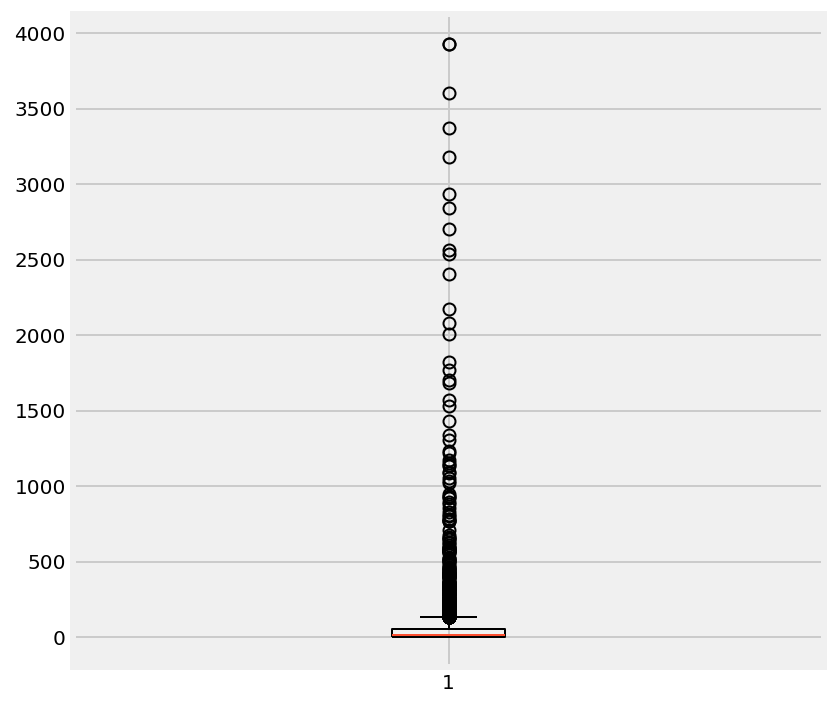

In [124]:
fig,ax=plt.subplots(figsize=(6,6))
ax = plt.boxplot(new_real_favorite_time['real_favorite_times'])
# ax.set(yscale="log")
plt.show()

In [125]:
new_real_favorite_time.describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000,3435.00000
mean,7623.91179,154.18952,0.00495,36227.65939,0.96507,6582.41689,0.52664,670.10827,2267.75400,70.35604,10930.76769
std,3922.67418,392.51224,0.07019,31639.32367,1.12158,17086.97512,0.49936,2391.76565,4570.06499,231.14873,14642.65453
min,187.00000,3.00000,0.00000,2616.00000,0.00000,3.00000,0.00000,0.00000,457.00000,2.00000,0.00000
25%,5421.50000,14.00000,0.00000,15214.00000,0.00000,524.00000,0.00000,37.92800,1140.00000,4.00000,0.00000
50%,9047.00000,72.00000,0.00000,27395.00000,1.00000,2453.00000,1.00000,150.31000,1292.00000,17.00000,5471.00000
75%,10046.50000,162.00000,0.00000,38231.50000,2.00000,5910.50000,1.00000,442.29600,1666.50000,55.00000,18177.00000
max,15130.00000,5452.00000,1.00000,382524.00000,10.00000,382572.00000,1.00000,82040.25000,81294.00000,3929.00000,44892.00000


In [126]:
boxplot_num(new_real_favorite_time.real_favorite_times)

Above 131.5 
 Q3 55.0 
 Q2 17.0 
 Q1 4.0 
 Below -72.5


In [127]:
len(new_real_favorite_time[new_real_favorite_time['real_favorite_times']> 132] )

356

In [128]:
new_real_favorite_time=new_real_favorite_time[new_real_favorite_time['real_favorite_times']<132]

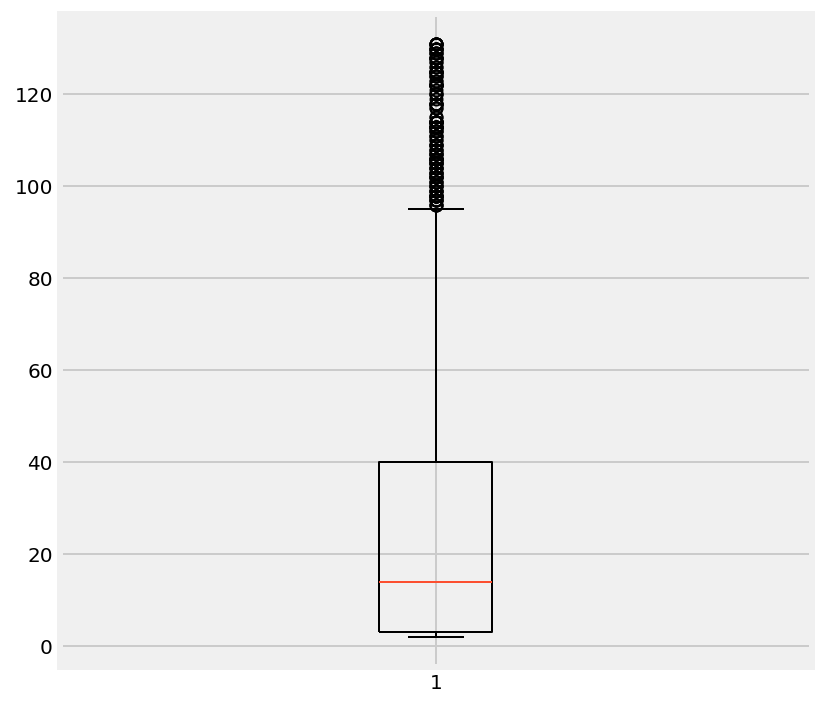

In [129]:
fig,ax=plt.subplots(figsize=(6,6))
ax = plt.boxplot(new_real_favorite_time['real_favorite_times'])
# ax.set(yscale="log")
plt.show()

In [130]:
boxplot_num(new_real_favorite_time.real_favorite_times)

Above 95.5 
 Q3 40.0 
 Q2 14.0 
 Q1 3.0 
 Below -52.5


In [131]:
new_real_favorite_time.describe()

,id,duration,sort_index,access_times,access_type,real_access_times,direction,popularity,favorite_times,real_favorite_times,author_id
count,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000,3076.00000
mean,7427.10891,155.76365,0.00553,32327.71424,0.99577,3281.69603,0.53869,277.36142,1498.07932,26.33875,10240.68205
std,4028.99922,413.07849,0.07415,26089.36874,1.14209,4676.27947,0.49858,651.51672,1055.63097,30.13812,14504.36460
min,187.00000,3.00000,0.00000,2616.00000,0.00000,3.00000,0.00000,0.00000,457.00000,2.00000,0.00000
25%,4978.75000,13.00000,0.00000,14308.00000,0.00000,451.75000,0.00000,32.30750,1112.00000,3.00000,0.00000
50%,7572.00000,64.00000,0.00000,25761.50000,1.00000,1944.50000,1.00000,120.00700,1264.00000,14.00000,5471.00000
75%,10074.25000,154.25000,0.00000,37137.00000,2.00000,4512.75000,1.00000,309.99150,1487.00000,40.00000,18173.00000
max,15130.00000,5452.00000,1.00000,121958.00000,10.00000,115032.00000,1.00000,15320.12100,10776.00000,131.00000,44892.00000


In [132]:
# planning to merge tables into 2 tables, user_info and video_info.